# **Importing Necessary Libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the data**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NDL/Fisheris/Dataset/Fisheries Node Data Mymensingh.csv", encoding='unicode_escape', parse_dates=['created_at'])

In [ ]:
df.head()

created_at  Entry  DO(mg/l)        pH  Turbidity(NTU)  \
0 2023-11-16 01:56:32+06:00      1   4.01077  10.42275             240   
1 2023-11-16 06:00:51+06:00      2   1.20577   8.78290             240   
2 2023-11-16 08:02:57+06:00      3   1.62462   8.49352             240   
3 2023-11-16 10:05:03+06:00      4   4.31538   9.89910             240   
4 2023-11-16 12:07:10+06:00      5   6.20654   9.62349             240   

   Temperature(°C)  EC(µS/cm)  
0          27.1875  354.23050  
1          26.8125  352.41229  
2          26.7500  354.09076  
3          27.0000  932.69946  
4          27.0625  357.22980

In [ ]:
df.shape

(267, 7)

In [ ]:
df.dtypes

created_at         datetime64[ns, pytz.FixedOffset(360)]
Entry                                              int64
DO(mg/l)                                         float64
pH                                               float64
Turbidity(NTU)                                     int64
Temperature(°C)                                  float64
EC(µS/cm)                                        float64
dtype: object

In [ ]:
df.describe()

Entry    DO(mg/l)          pH  Turbidity(NTU)  Temperature(°C)  \
count  267.000000  267.000000  267.000000      267.000000       267.000000   
mean   134.000000    2.793924    8.555244       65.307116        24.236423   
std     77.220464    3.469753    0.919001       77.490791         2.004450   
min      1.000000    0.000000    6.780180        1.000000        20.687500   
25%     67.500000    0.000000    7.829770       15.000000        22.281250   
50%    134.000000    1.370770    8.534860       35.000000        24.625000   
75%    200.500000    4.359805    9.044730       70.000000        26.062500   
max    267.000000   19.774610   13.252290      240.000000        28.062500   

         EC(µS/cm)  
count   267.000000  
mean    366.313607  
std      96.483586  
min     288.014310  
25%     320.819380  
50%     359.177700  
75%     376.674575  
max    1002.647220

# Copy main dataframe

In [ ]:
df_work = df.copy()

# Drop created_at, Entry and turbudity column

In [ ]:
df_work.drop(['Entry'], axis=1, inplace=True)

In [ ]:
# Convert 'created_at' column to datetime format
df_work['created_at'] = pd.to_datetime(df_work['created_at'])
df_work.set_index('created_at', inplace=True)
df_work.head()

DO(mg/l)        pH  Turbidity(NTU)  \
created_at                                                      
2023-11-16 01:56:32+06:00   4.01077  10.42275             240   
2023-11-16 06:00:51+06:00   1.20577   8.78290             240   
2023-11-16 08:02:57+06:00   1.62462   8.49352             240   
2023-11-16 10:05:03+06:00   4.31538   9.89910             240   
2023-11-16 12:07:10+06:00   6.20654   9.62349             240   

                           Temperature(°C)  EC(µS/cm)  
created_at                                             
2023-11-16 01:56:32+06:00          27.1875  354.23050  
2023-11-16 06:00:51+06:00          26.8125  352.41229  
2023-11-16 08:02:57+06:00          26.7500  354.09076  
2023-11-16 10:05:03+06:00          27.0000  932.69946  
2023-11-16 12:07:10+06:00          27.0625  357.22980

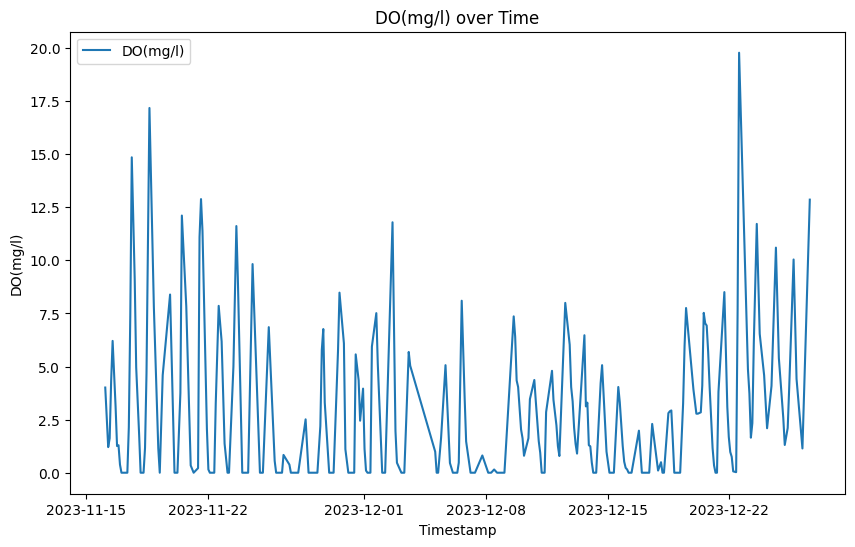

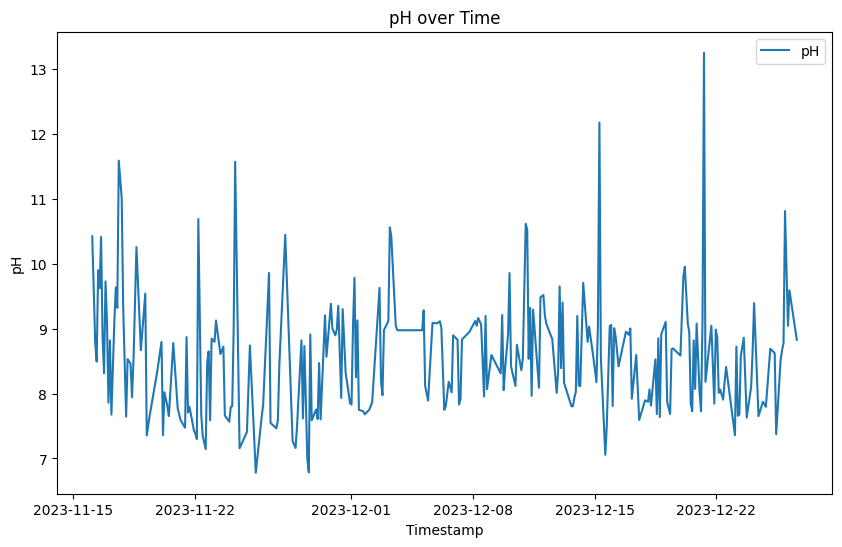

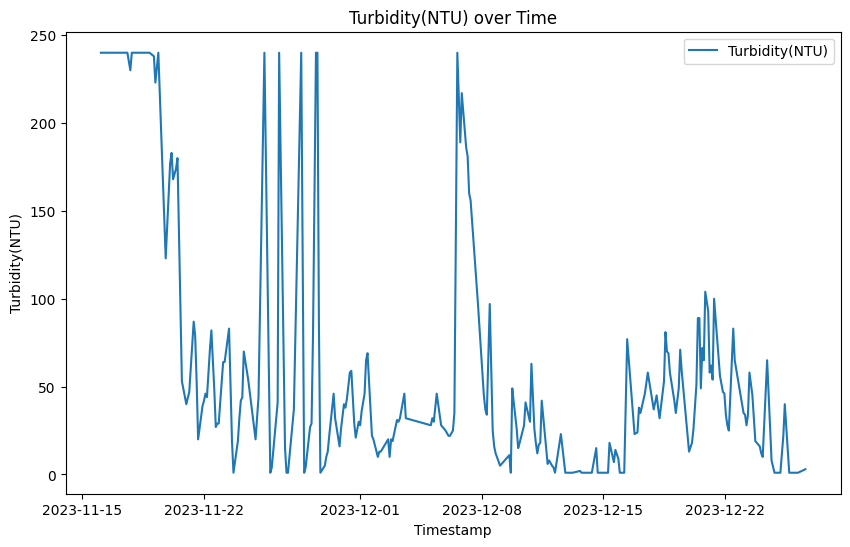

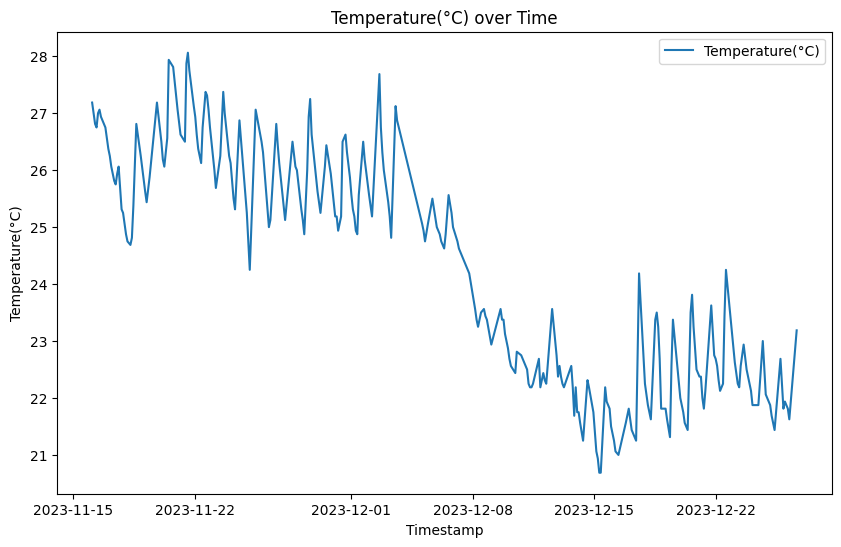

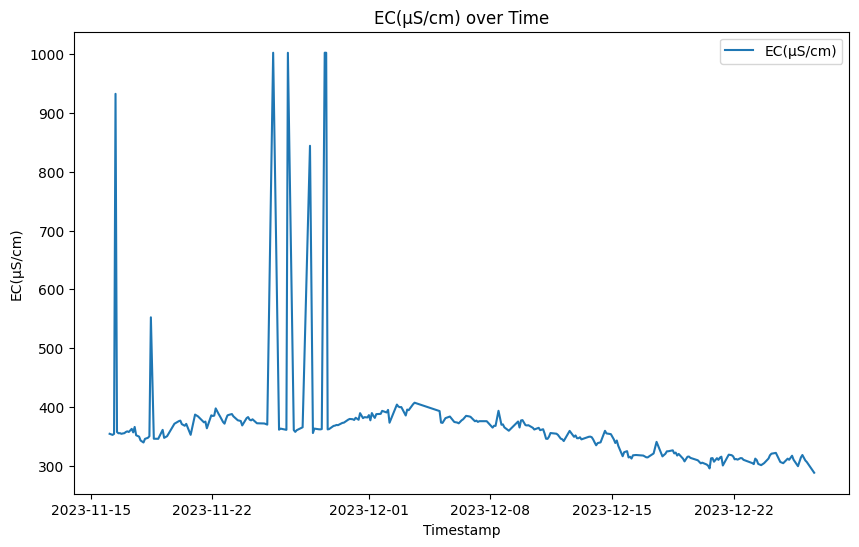

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot each column individually
for column in df_work.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df_work.index, df_work[column], label=column)
    plt.title(f'{column} over Time')
    plt.xlabel('Timestamp')
    plt.ylabel(column)
    plt.legend()
    plt.show()


In [ ]:
train = df_work[:-7]
test = df_work[-7:]

In [ ]:
df_work.columns

Index(['DO(mg/l)', 'pH', 'Turbidity(NTU)', 'Temperature(°C)', 'EC(µS/cm)'], dtype='object')

# Forecast using the mean value

In [ ]:
historical_mean_DO = np.mean(train['DO(mg/l)'])
historical_mean_pH = np.mean(train['pH'])
historical_mean_Temp = np.mean(train['Temperature(°C)'])
historical_mean_Turbidity = np.mean(train['Turbidity(NTU)'])
historical_mean_EC = np.mean(train['EC(µS/cm)'])
historical_mean_DO, historical_mean_pH, historical_mean_Temp, historical_mean_Turbidity, historical_mean_EC

(2.7101983076923077,
 8.538497076923079,
 24.291586538461537,
 67.03076923076924,
 367.9414101153846)

In [ ]:
test.loc[:, 'pred_mean_DO'] = historical_mean_DO
test.loc[:, 'pred_mean_pH'] = historical_mean_pH
test.loc[:, 'pred_mean_Temp'] = historical_mean_Temp
test.loc[:, 'pred_mean_Turbidity'] = historical_mean_Turbidity
test.loc[:, 'pred_mean_EC'] = historical_mean_EC
test.head()

<ipython-input-15-074a84ad619a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean_DO'] = historical_mean_DO
<ipython-input-15-074a84ad619a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean_pH'] = historical_mean_pH
<ipython-input-15-074a84ad619a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

DO(mg/l)        pH  Turbidity(NTU)  \
created_at                                                      
2023-12-25 16:58:20+06:00  10.03962   8.51189               1   
2023-12-25 19:00:27+06:00   7.31077   8.67266               1   
2023-12-25 21:02:33+06:00   4.41692   8.77831               1   
2023-12-25 23:04:39+06:00   3.60462  10.81319               1   
2023-12-26 03:08:52+06:00   1.95462   9.04473               1   

                           Temperature(°C)  EC(µS/cm)  pred_mean_DO  \
created_at                                                            
2023-12-25 16:58:20+06:00          22.6875  299.13251      2.710198   
2023-12-25 19:00:27+06:00          22.2500  306.51920      2.710198   
2023-12-25 21:02:33+06:00          21.8125  314.04672      2.710198   
2023-12-25 23:04:39+06:00          21.9375  318.16418      2.710198   
2023-12-26 03:08:52+06:00          21.8125  308.86383      2.710198   

                           pred_mean_pH  pred_mean_Temp  pred_mean_Turbidity  \
created_at                                                                     
2023-12-25 16:58:20+06:00      8.538497       24.291587            67.030769   
2023-12-25 19:00:27+06:00      8.538497       24.291587            67.030769   
2023-12-25 21:02:33+06:00      8.538497       24.291587            67.030769   
2023-12-25 23:04:39+06:00      8.538497       24.291587            67.030769   
2023-12-26 03:08:52+06:00      8.538497       24.291587            67.030769   

                           pred_mean_EC  
created_at                               
2023-12-25 16:58:20+06:00     367.94141  
2023-12-25 19:00:27+06:00     367.94141  
2023-12-25 21:02:33+06:00     367.94141  
2023-12-25 23:04:39+06:00     367.94141  
2023-12-26 03:08:52+06:00     367.94141

# Calculate mean absolute percentage error

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
df_work.columns

Index(['DO(mg/l)', 'pH', 'Turbidity(NTU)', 'Temperature(°C)', 'EC(µS/cm)'], dtype='object')

In [ ]:
mape_hist_mean_DO = mape(test['DO(mg/l)'], test['pred_mean_DO'])
mape_hist_mean_pH = mape(test['pH'], test['pred_mean_pH'])
mape_hist_mean_Temp = mape(test['Temperature(°C)'], test['pred_mean_Temp'])
mape_hist_mean_Turbidity = mape(test['Turbidity(NTU)'], test['pred_mean_Turbidity'])
mape_hist_mean_EC = mape(test['EC(µS/cm)'], test['pred_mean_EC'])

mape_hist_mean_DO, mape_hist_mean_pH, mape_hist_mean_Temp, mape_hist_mean_Turbidity, mape_hist_mean_EC

(64.88861639624643,
 6.49859784134017,
 9.542911025628404,
 5964.688644688646,
 20.411436996922003)

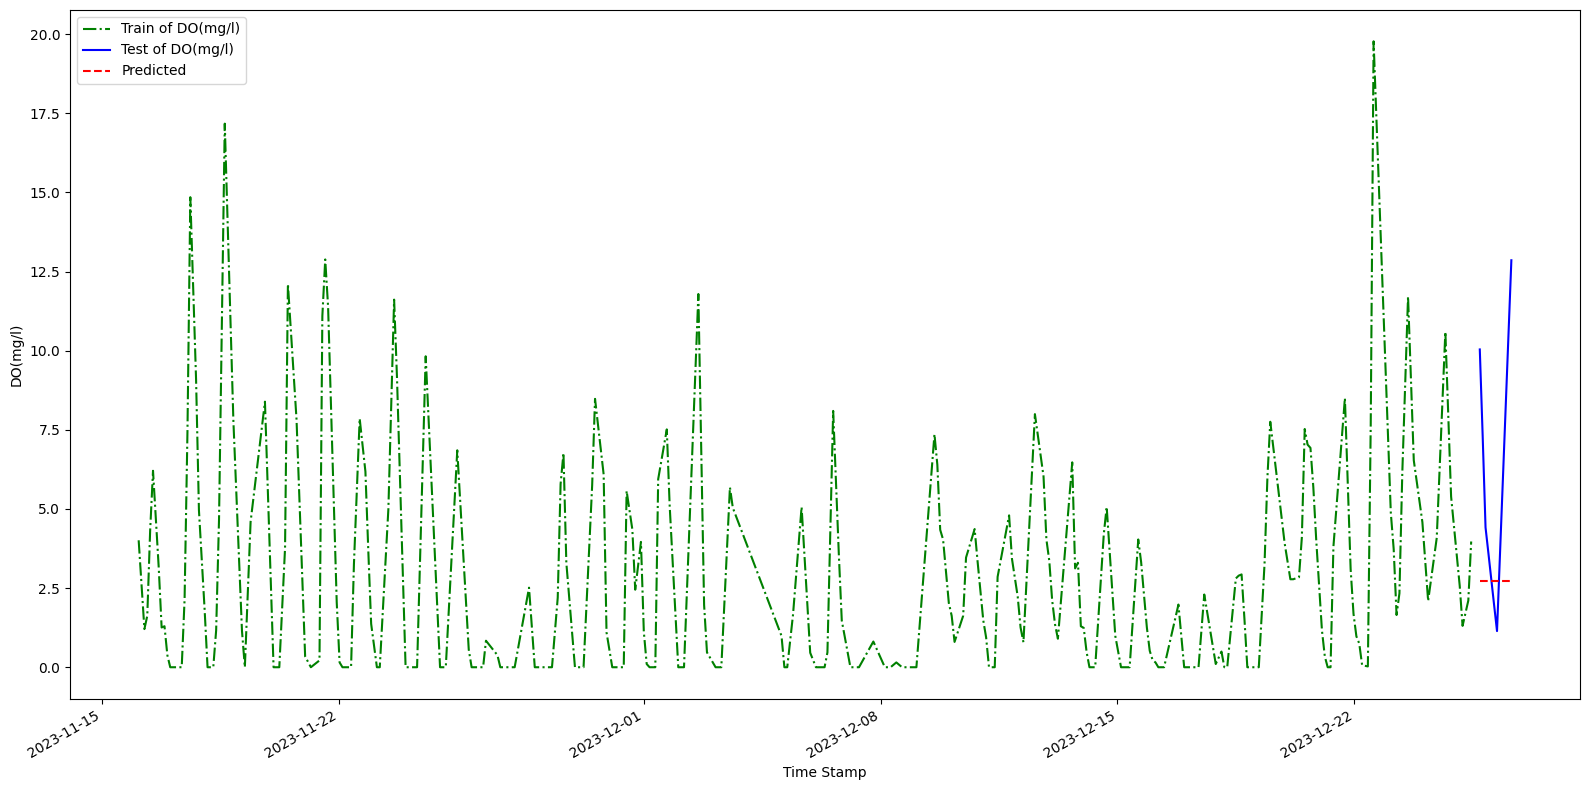

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['DO(mg/l)'], 'g-.', label='Train of DO(mg/l)')
ax.plot(test.index, test['DO(mg/l)'], 'b-', label='Test of DO(mg/l)')

ax.plot(test.index, test['pred_mean_DO'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('DO(mg/l)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

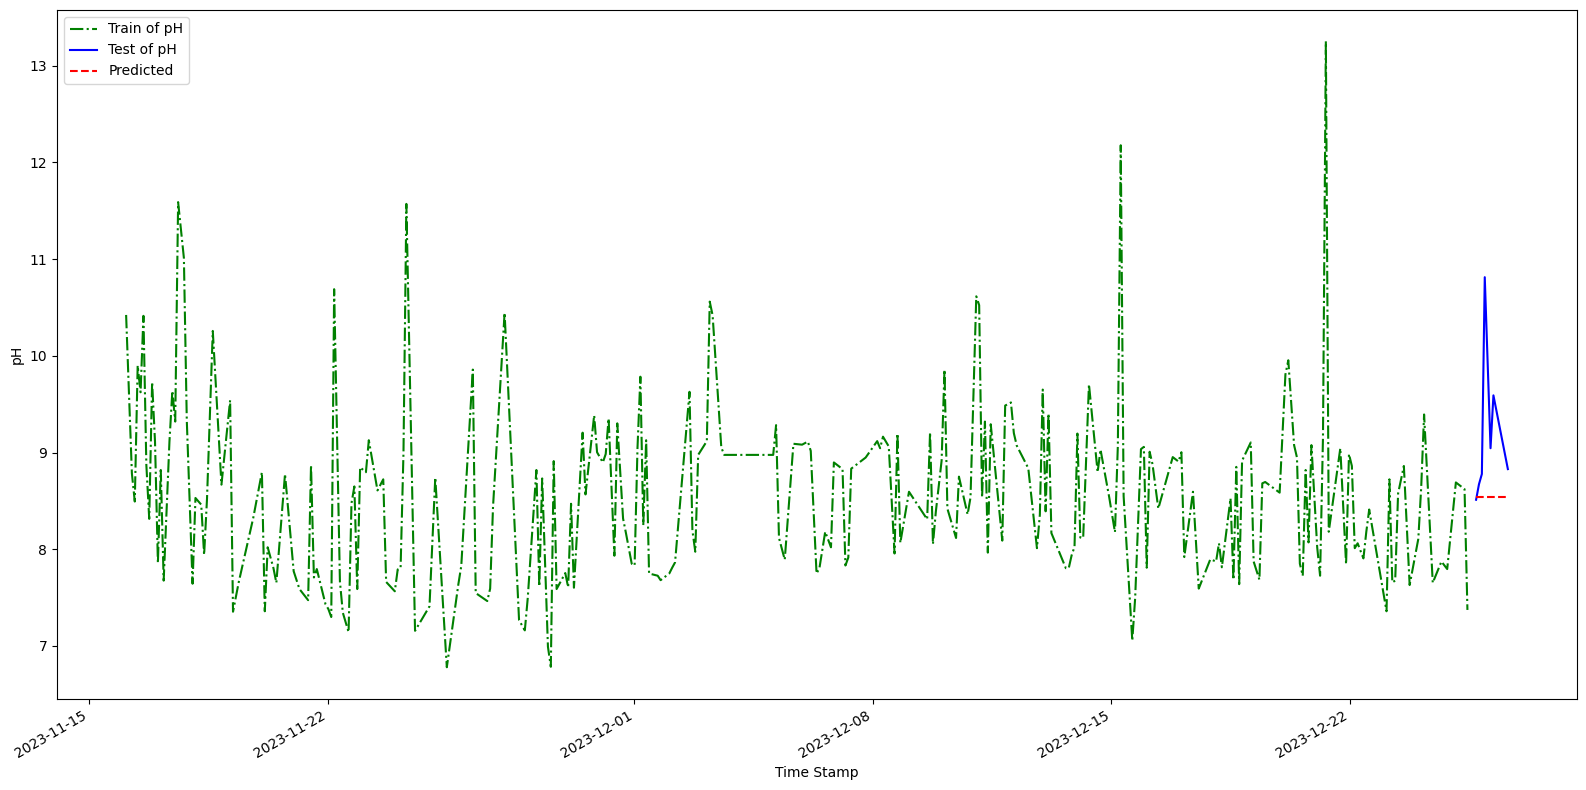

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['pH'], 'g-.', label='Train of pH')
ax.plot(test.index, test['pH'], 'b-', label='Test of pH')

ax.plot(test.index, test['pred_mean_pH'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('pH')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

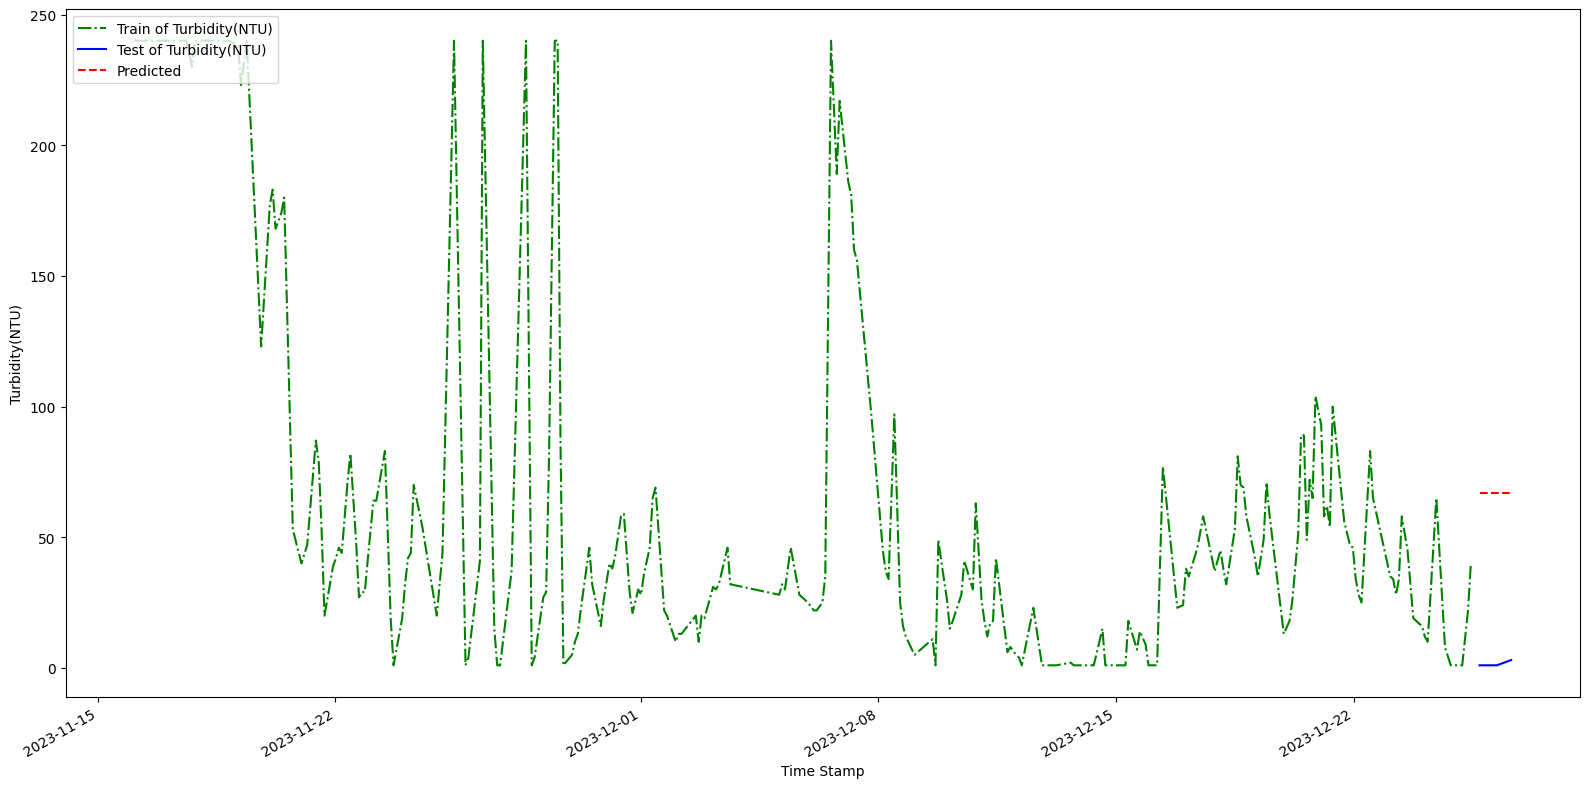

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['Turbidity(NTU)'], 'g-.', label='Train of Turbidity(NTU)')
ax.plot(test.index, test['Turbidity(NTU)'], 'b-', label='Test of Turbidity(NTU)')

ax.plot(test.index, test['pred_mean_Turbidity'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('Turbidity(NTU)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

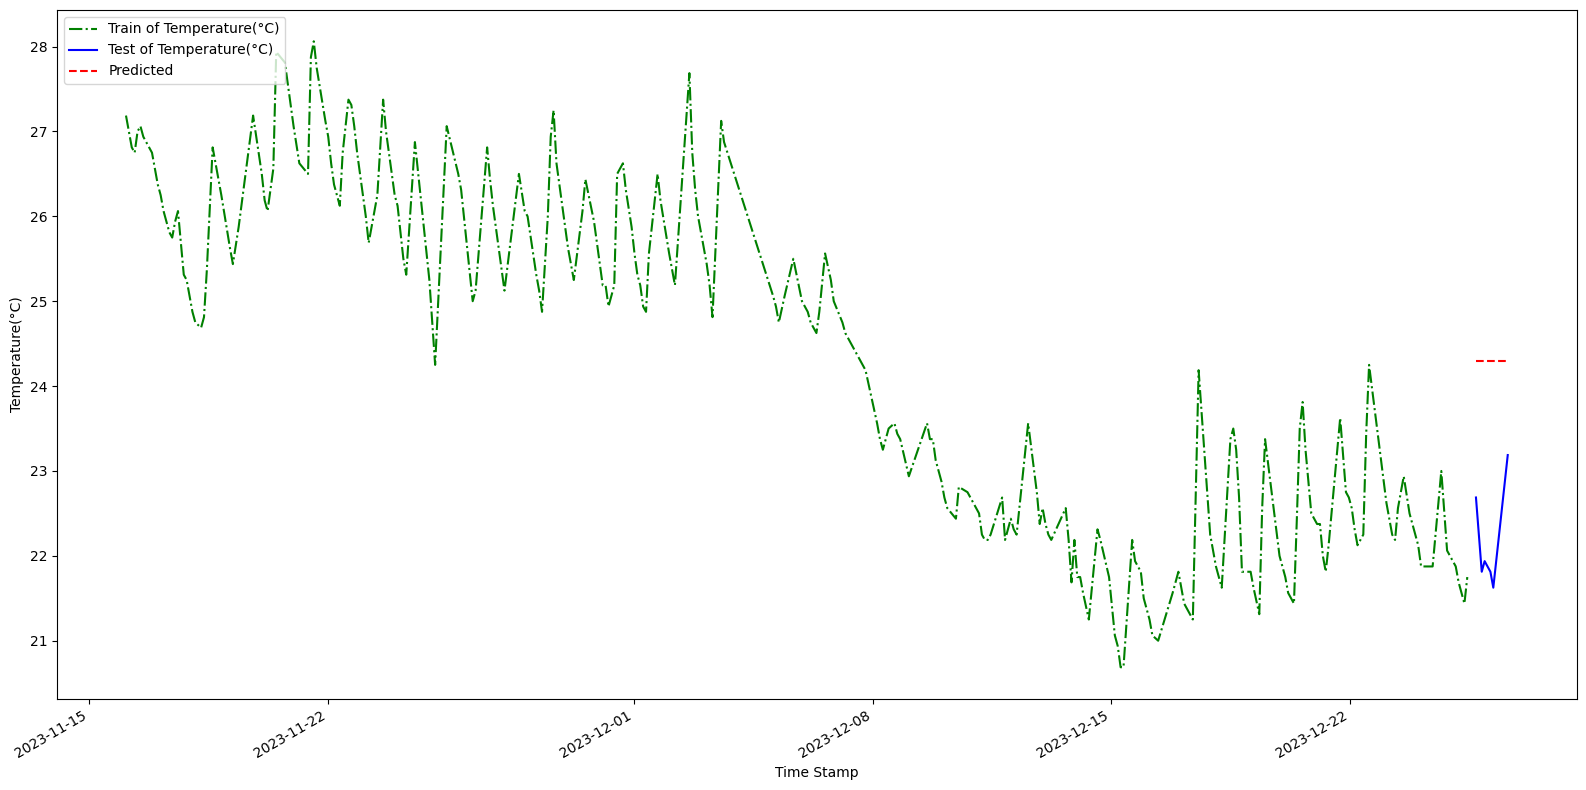

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['Temperature(°C)'], 'g-.', label='Train of Temperature(°C)')
ax.plot(test.index, test['Temperature(°C)'], 'b-', label='Test of Temperature(°C)')
ax.plot(test.index, test['pred_mean_Temp'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('Temperature(°C)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

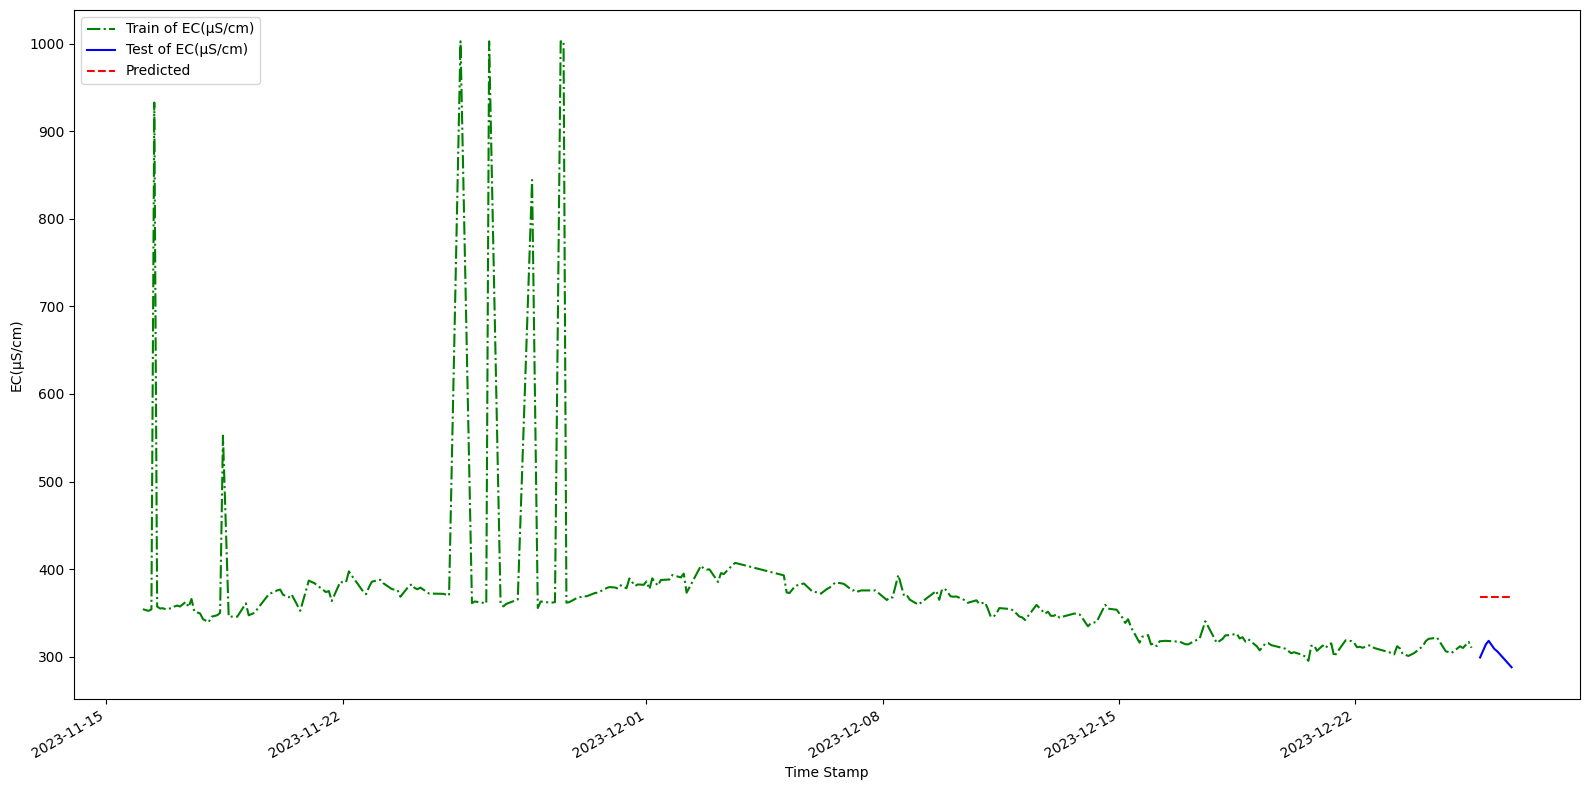

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['EC(µS/cm)'], 'g-.', label='Train of EC(µS/cm)')
ax.plot(test.index, test['EC(µS/cm)'], 'b-', label='Test of EC(µS/cm)')

ax.plot(test.index, test['pred_mean_EC'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('EC(µS/cm)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# Forecast using the last data points mean values (Recent mean values)

In [ ]:
df_work.columns

Index(['DO(mg/l)', 'pH', 'Turbidity(NTU)', 'Temperature(°C)', 'EC(µS/cm)'], dtype='object')

In [ ]:
last_year_mean_DO = np.mean(train['DO(mg/l)'][-7:])
last_year_mean_pH = np.mean(train['pH'][-7:])
last_year_mean_Turbidity = np.mean(train['Turbidity(NTU)'][-7:])
last_year_mean_Temp = np.mean(train['Temperature(°C)'][-7:])
last_year_mean_EC = np.mean(train['EC(µS/cm)'][-7:])

last_year_mean_DO, last_year_mean_pH, last_year_mean_Turbidity, last_year_mean_Temp, last_year_mean_EC

(4.291812857142857,
 8.096515714285713,
 19.714285714285715,
 21.955357142857142,
 311.61857428571426)

In [ ]:
test.loc[:, 'pred__last_yr_mean_DO'] = last_year_mean_DO
test.loc[:, 'pred__last_yr_mean_pH'] = last_year_mean_pH
test.loc[:, 'pred__last_yr_mean_Turbidity'] = last_year_mean_Turbidity
test.loc[:, 'pred__last_yr_mean_Temp'] = last_year_mean_Temp
test.loc[:, 'pred__last_yr_mean_EC'] = last_year_mean_EC

<ipython-input-76-e9cfa1716dea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred__last_yr_mean_DO'] = last_year_mean_DO
<ipython-input-76-e9cfa1716dea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred__last_yr_mean_pH'] = last_year_mean_pH
<ipython-input-76-e9cfa1716dea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [ ]:
test.head()

DO(mg/l)        pH  Turbidity(NTU)  \
created_at                                                      
2023-12-25 16:58:20+06:00  10.03962   8.51189               1   
2023-12-25 19:00:27+06:00   7.31077   8.67266               1   
2023-12-25 21:02:33+06:00   4.41692   8.77831               1   
2023-12-25 23:04:39+06:00   3.60462  10.81319               1   
2023-12-26 03:08:52+06:00   1.95462   9.04473               1   

                           Temperature(°C)  EC(µS/cm)  pred_mean_DO  \
created_at                                                            
2023-12-25 16:58:20+06:00          22.6875  299.13251      2.710198   
2023-12-25 19:00:27+06:00          22.2500  306.51920      2.710198   
2023-12-25 21:02:33+06:00          21.8125  314.04672      2.710198   
2023-12-25 23:04:39+06:00          21.9375  318.16418      2.710198   
2023-12-26 03:08:52+06:00          21.8125  308.86383      2.710198   

                           pred_mean_pH  pred_mean_Temp  pred_mean_Turbidity  \
created_at                                                                     
2023-12-25 16:58:20+06:00      8.538497       24.291587            67.030769   
2023-12-25 19:00:27+06:00      8.538497       24.291587            67.030769   
2023-12-25 21:02:33+06:00      8.538497       24.291587            67.030769   
2023-12-25 23:04:39+06:00      8.538497       24.291587            67.030769   
2023-12-26 03:08:52+06:00      8.538497       24.291587            67.030769   

                           pred_mean_EC  ...  pred_last_do  pred_last_ph  \
created_at                               ...                               
2023-12-25 16:58:20+06:00     367.94141  ...       3.97269       7.37273   
2023-12-25 19:00:27+06:00     367.94141  ...       3.97269       7.37273   
2023-12-25 21:02:33+06:00     367.94141  ...       3.97269       7.37273   
2023-12-25 23:04:39+06:00     367.94141  ...       3.97269       7.37273   
2023-12-26 03:08:52+06:00     367.94141  ...       3.97269       7.37273   

                           pred_last_temp  pred_last_turbidity  pred_last_ec  \
created_at                                                                     
2023-12-25 16:58:20+06:00           21.75                   40     310.18036   
2023-12-25 19:00:27+06:00           21.75                   40     310.18036   
2023-12-25 21:02:33+06:00           21.75                   40     310.18036   
2023-12-25 23:04:39+06:00           21.75                   40     310.18036   
2023-12-26 03:08:52+06:00           21.75                   40     310.18036   

                           pred_last_season_do  pred_last_season_ph  \
created_at                                                            
2023-12-25 16:58:20+06:00              4.08692              7.65292   
2023-12-25 19:00:27+06:00             10.59808              7.87341   
2023-12-25 21:02:33+06:00              5.39423              7.79532   
2023-12-25 23:04:39+06:00              2.57654              8.69103   
2023-12-26 03:08:52+06:00              1.30731              8.66807   

                           pred_last_season_turbidity  pred_last_season_temp  \
created_at                                                                     
2023-12-25 16:58:20+06:00                          65                21.8750   
2023-12-25 19:00:27+06:00                           8                23.0000   
2023-12-25 21:02:33+06:00                           1                22.0625   
2023-12-25 23:04:39+06:00                           1                21.8750   
2023-12-26 03:08:52+06:00                           1                21.6875   

                           pred_last_season_ec  
created_at                                      
2023-12-25 16:58:20+06:00            321.75906  
2023-12-25 19:00:27+06:00            306.27463  
2023-12-25 21:02:33+06:00            304.21811  
2023-12-25 23:04:39+06:00            311.93298  
2023-12-26 03:08:52+06:00            310.03415  

[5 rows x 25 co

In [ ]:
mape_last_year_mean_DO = mape(test['DO(mg/l)'], test['pred__last_yr_mean_DO'])
mape_last_year_mean_pH = mape(test['pH'], test['pred__last_yr_mean_pH'])
mape_last_year_mean_Turbidity = mape(test['Turbidity(NTU)'], test['pred__last_yr_mean_Turbidity'])
mape_last_year_mean_Temp = mape(test['Temperature(°C)'], test['pred__last_yr_mean_Temp'])
mape_last_year_mean_EC = mape(test['EC(µS/cm)'], test['pred__last_yr_mean_EC'])

mape_last_year_mean_DO, mape_last_year_mean_pH, mape_last_year_mean_Turbidity, mape_last_year_mean_Temp, mape_last_year_mean_EC

(83.19264085688775,
 11.253857684750967,
 1683.6734693877552,
 1.826295035306118,
 2.7880991293816857)

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['DO(mg/l)'], 'g-.', label='Train of DO(mg/l)')
ax.plot(test.index, test['DO(mg/l)'], 'b-', label='Test of DO(mg/l)')

ax.plot(test.index, test['pred__last_yr_mean_DO'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('DO(mg/l)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

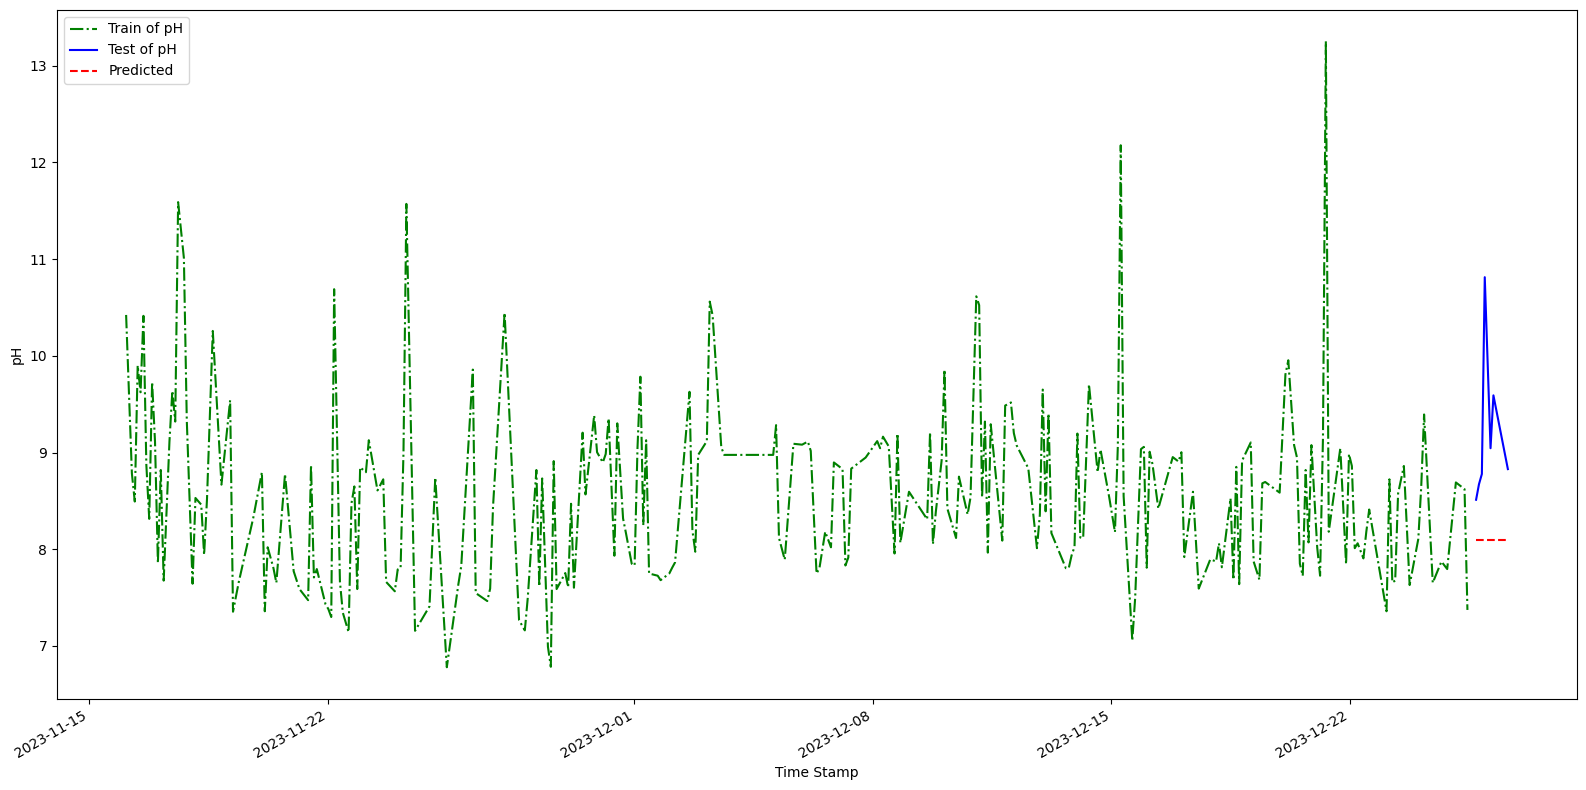

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['pH'], 'g-.', label='Train of pH')
ax.plot(test.index, test['pH'], 'b-', label='Test of pH')

ax.plot(test.index, test['pred__last_yr_mean_pH'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('pH')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

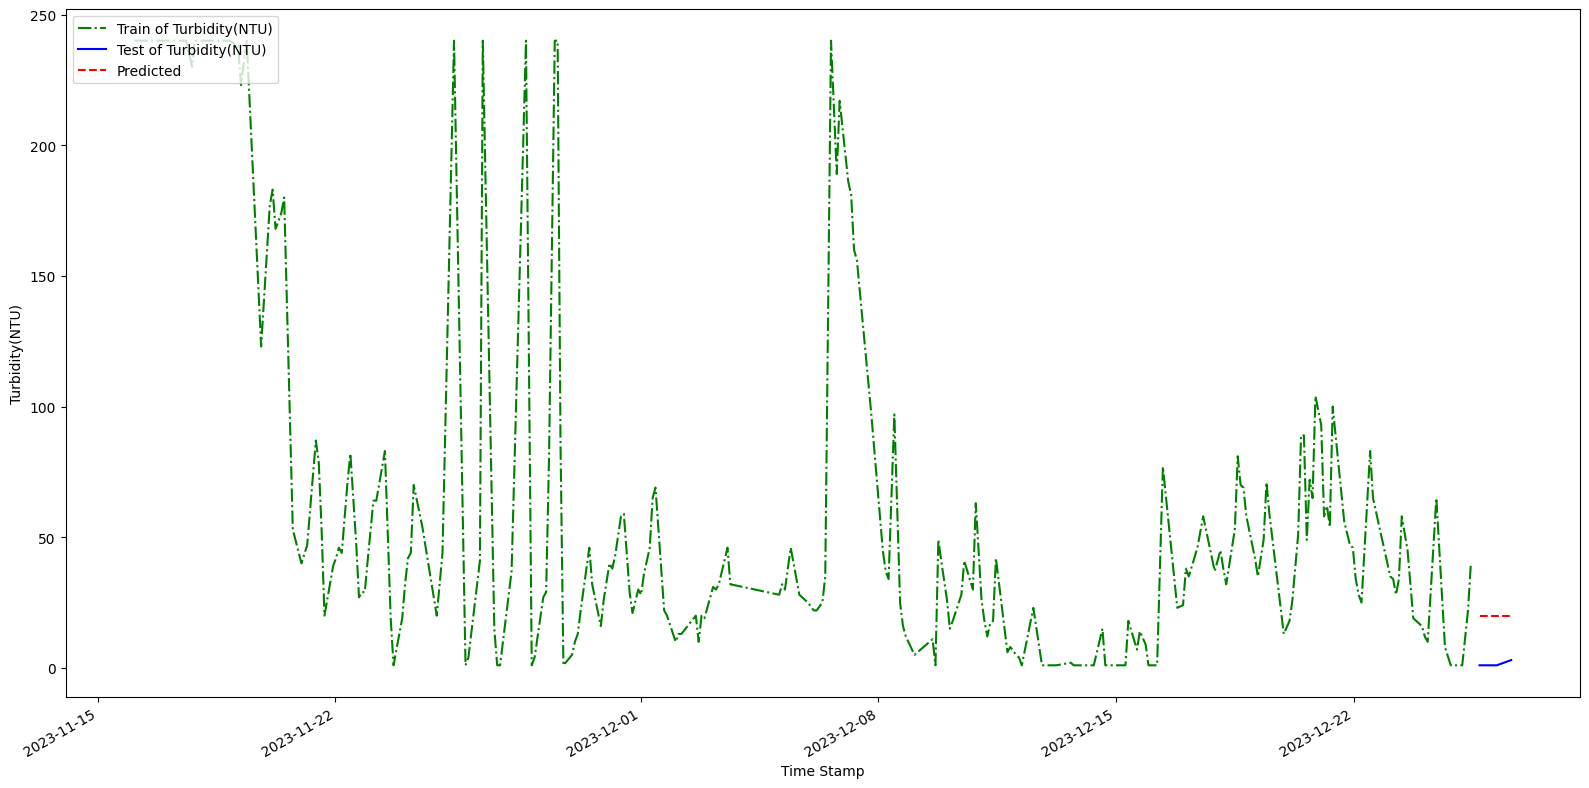

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['Turbidity(NTU)'], 'g-.', label='Train of Turbidity(NTU)')
ax.plot(test.index, test['Turbidity(NTU)'], 'b-', label='Test of Turbidity(NTU)')

ax.plot(test.index, test['pred__last_yr_mean_Turbidity'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('Turbidity(NTU)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

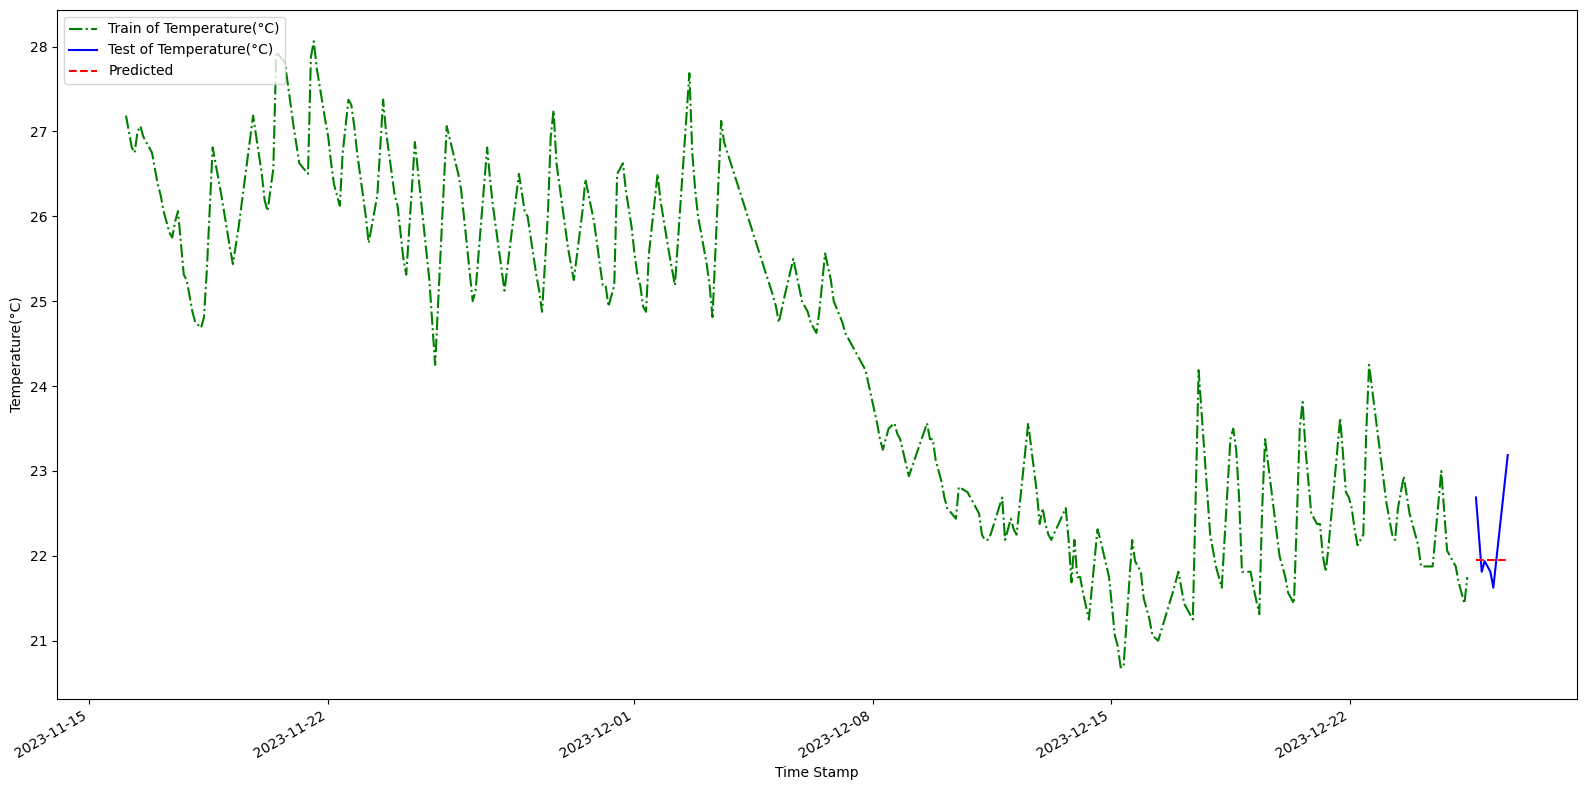

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['Temperature(°C)'], 'g-.', label='Train of Temperature(°C)')
ax.plot(test.index, test['Temperature(°C)'], 'b-', label='Test of Temperature(°C)')
ax.plot(test.index, test['pred__last_yr_mean_Temp'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('Temperature(°C)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

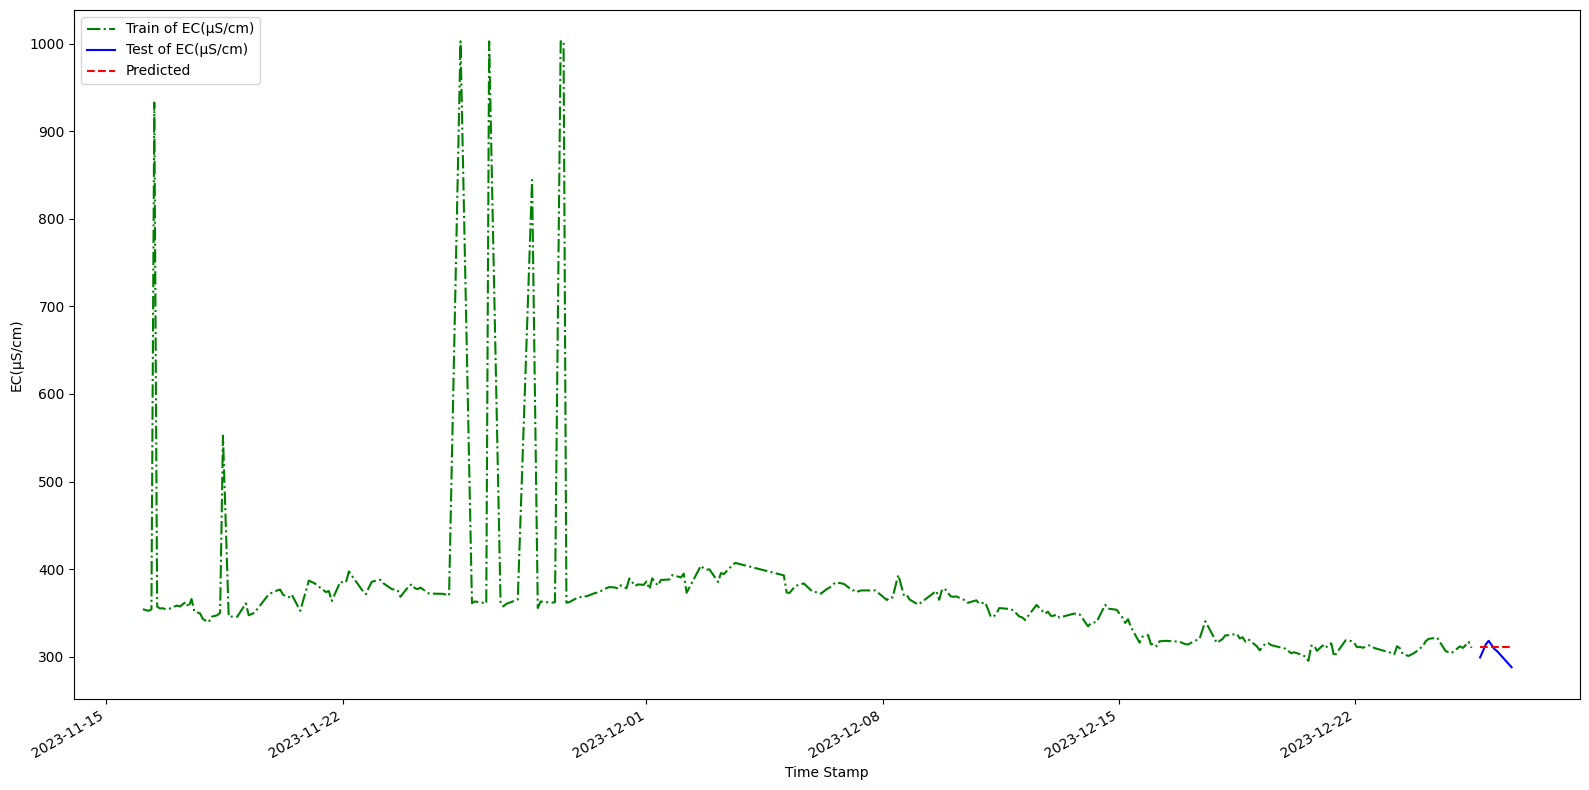

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['EC(µS/cm)'], 'g-.', label='Train of EC(µS/cm)')
ax.plot(test.index, test['EC(µS/cm)'], 'b-', label='Test of EC(µS/cm)')

ax.plot(test.index, test['pred__last_yr_mean_EC'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('EC(µS/cm)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# Forecast using the last known values

In [ ]:
last_do = train['DO(mg/l)'].iloc[-1]
last_ph = train['pH'].iloc[-1]
last_temp = train['Temperature(°C)'].iloc[-1]
last_turbidity = train['Turbidity(NTU)'].iloc[-1]
last_ec = train['EC(µS/cm)'].iloc[-1]

last_do, last_ph, last_temp, last_turbidity, last_ec

(3.97269, 7.37273, 21.75, 40, 310.18036)

In [ ]:
test.loc[:, 'pred_last_do'] = last_do
test.loc[:, 'pred_last_ph'] = last_ph
test.loc[:, 'pred_last_temp'] = last_temp
test.loc[:, 'pred_last_turbidity'] = last_turbidity
test.loc[:, 'pred_last_ec'] = last_ec

<ipython-input-37-fbefb1e536d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_do'] = last_do
<ipython-input-37-fbefb1e536d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_ph'] = last_ph
<ipython-input-37-fbefb1e536d6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [ ]:
mape_last_do = mape(test['DO(mg/l)'], test['pred_last_do'])
mape_last_ph = mape(test['pH'], test['pred_last_ph'])
mape_last_turbidity = mape(test['Turbidity(NTU)'], test['pred_last_turbidity'])
mape_last_temp = mape(test['Temperature(°C)'], test['pred_last_temp'])
mape_last_ec = mape(test['EC(µS/cm)'], test['pred_last_ec'])

mape_last_do, mape_last_ph, mape_last_turbidity, mape_last_temp, mape_last_ec

(78.06898425389109,
 19.187293779046357,
 3519.047619047619,
 2.0835263959996078,
 2.577432485872454)

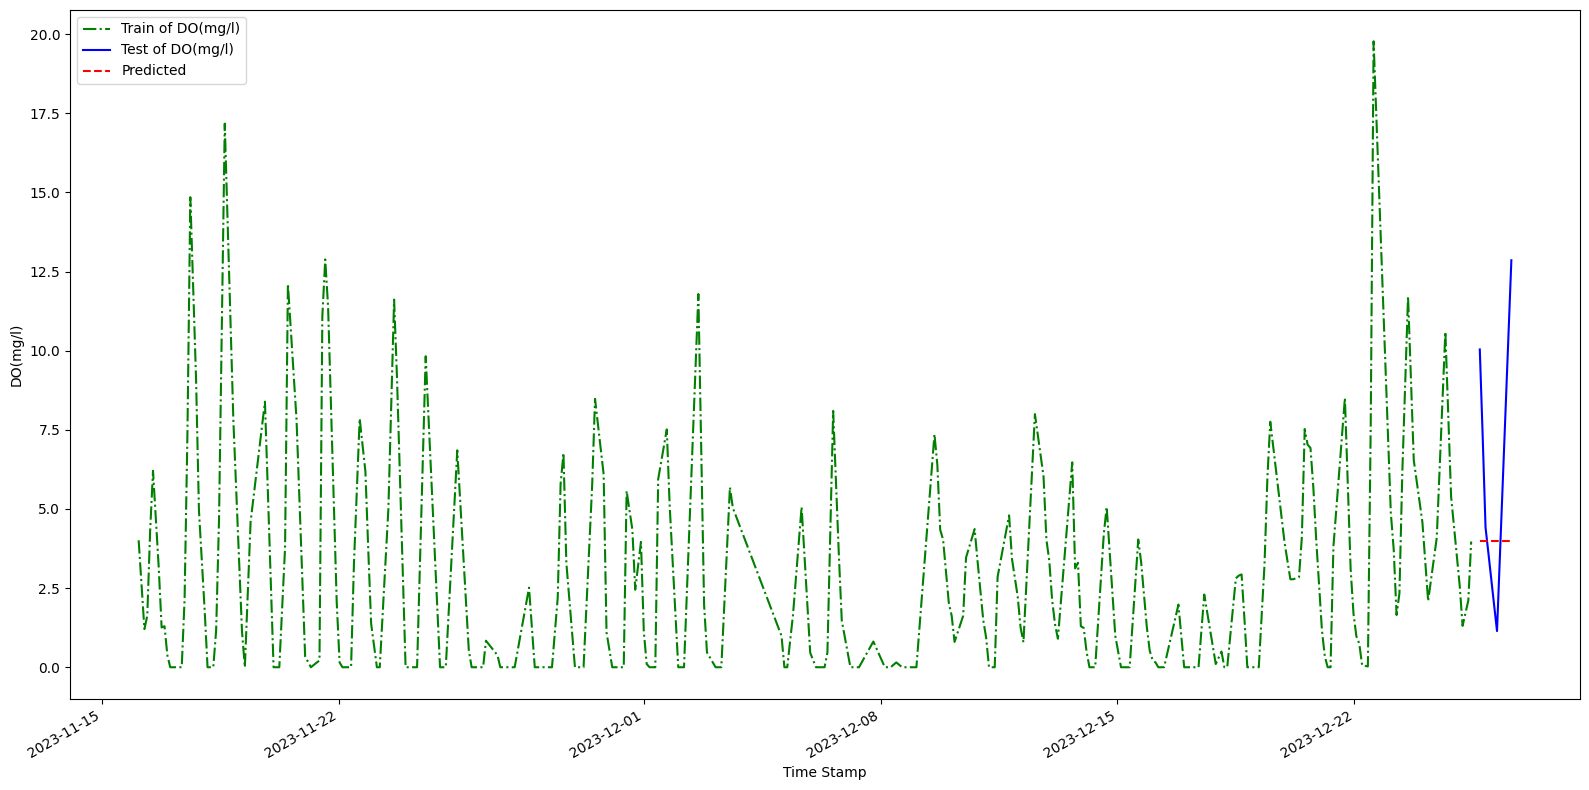

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['DO(mg/l)'], 'g-.', label='Train of DO(mg/l)')
ax.plot(test.index, test['DO(mg/l)'], 'b-', label='Test of DO(mg/l)')

ax.plot(test.index, test['pred_last_do'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('DO(mg/l)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

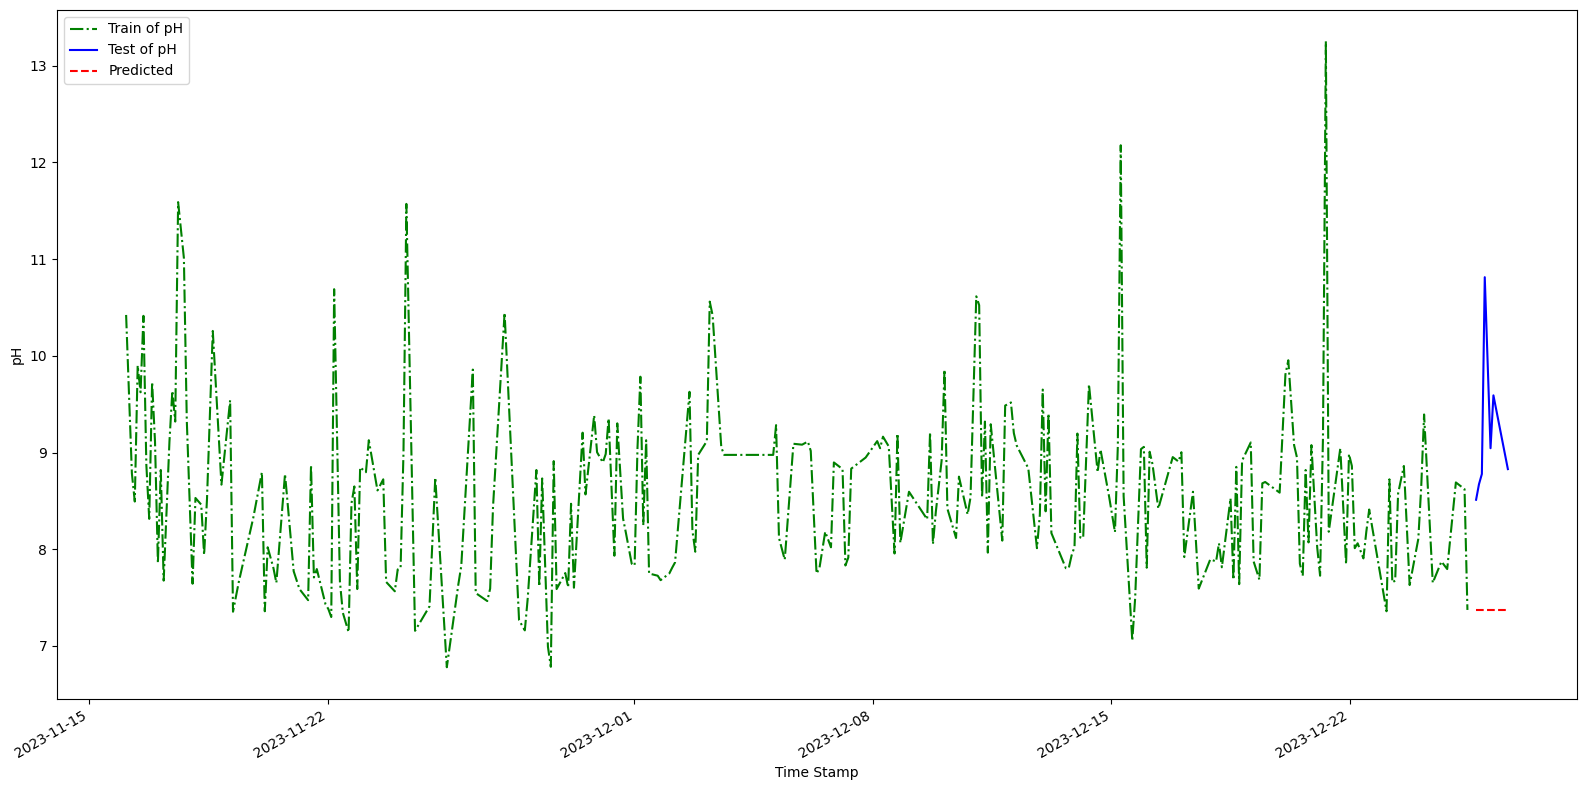

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['pH'], 'g-.', label='Train of pH')
ax.plot(test.index, test['pH'], 'b-', label='Test of pH')

ax.plot(test.index, test['pred_last_ph'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('pH')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

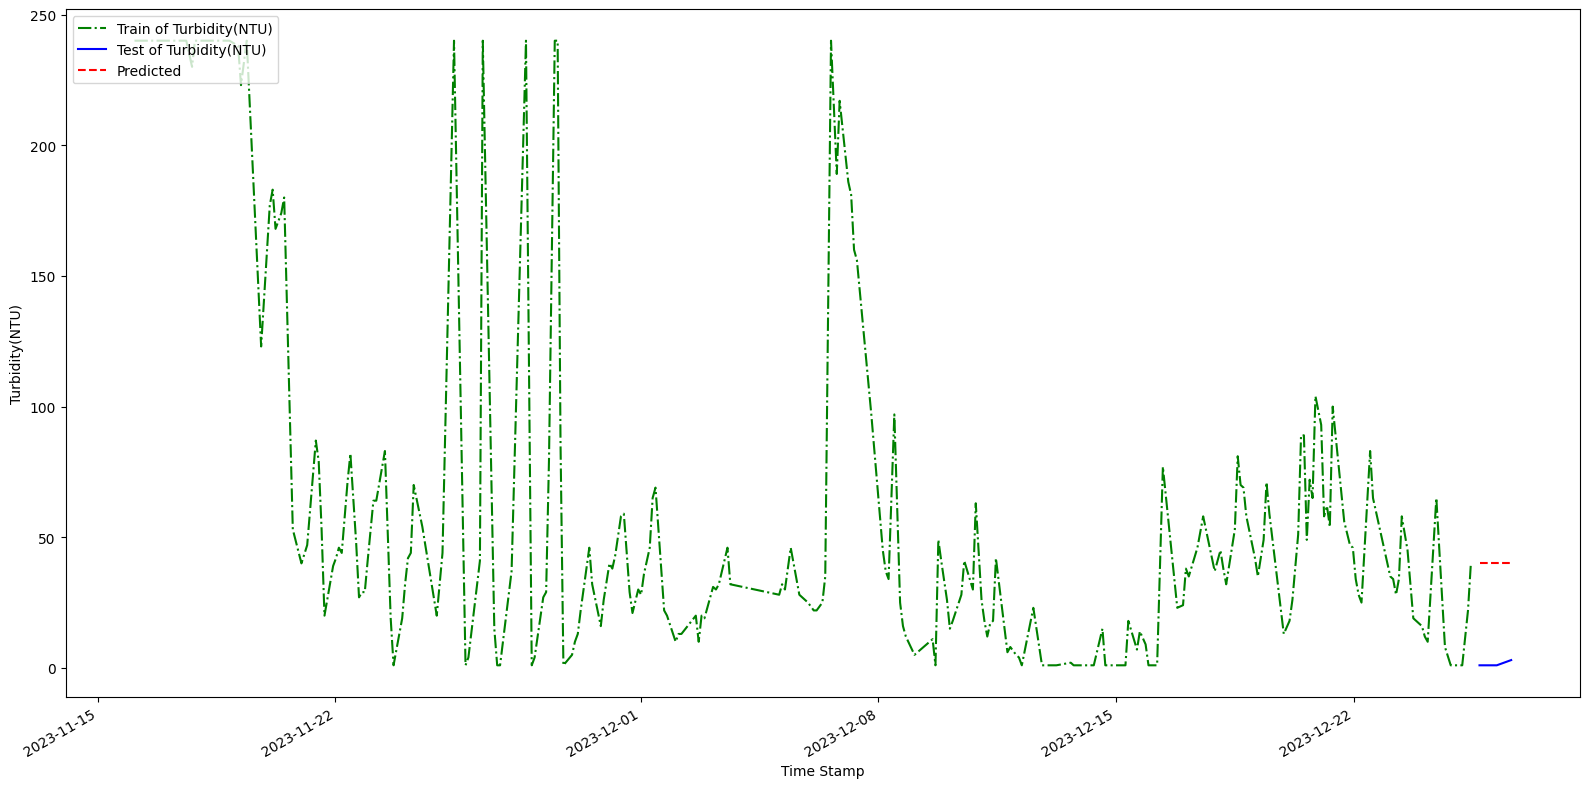

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['Turbidity(NTU)'], 'g-.', label='Train of Turbidity(NTU)')
ax.plot(test.index, test['Turbidity(NTU)'], 'b-', label='Test of Turbidity(NTU)')

ax.plot(test.index, test['pred_last_turbidity'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('Turbidity(NTU)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

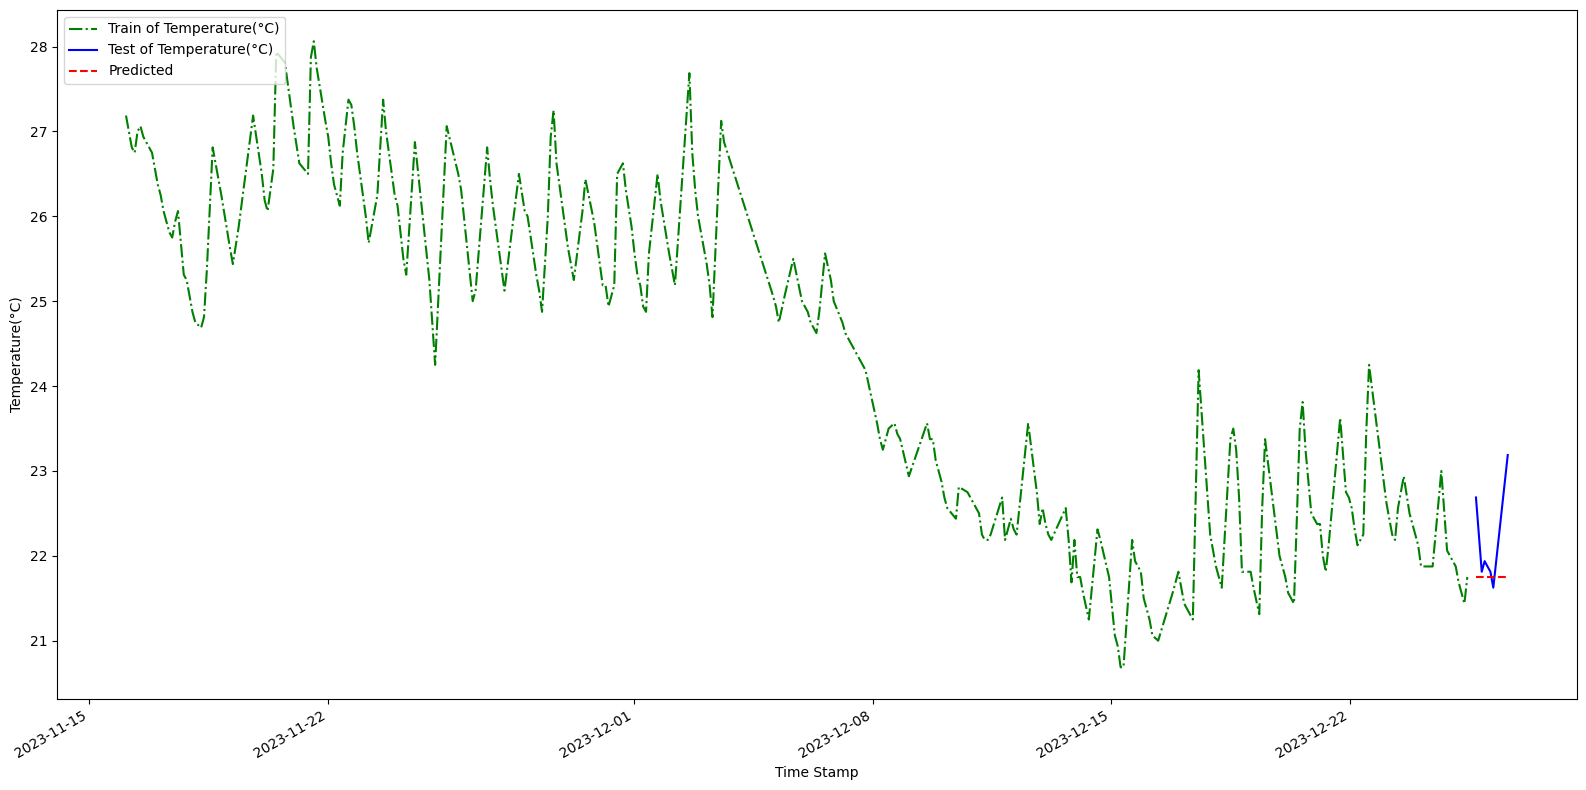

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['Temperature(°C)'], 'g-.', label='Train of Temperature(°C)')
ax.plot(test.index, test['Temperature(°C)'], 'b-', label='Test of Temperature(°C)')
ax.plot(test.index, test['pred_last_temp'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('Temperature(°C)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

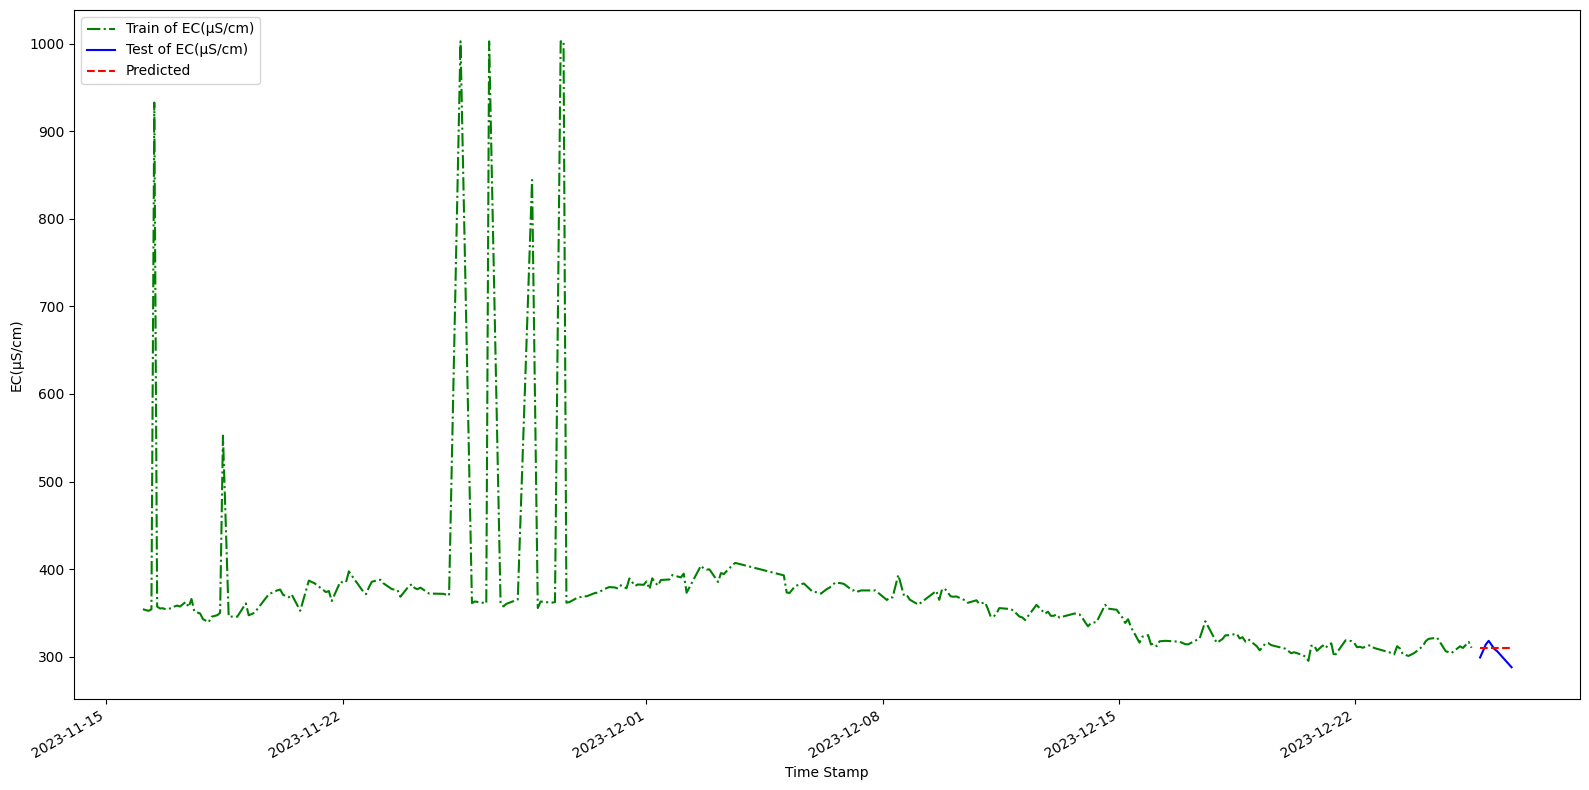

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['EC(µS/cm)'], 'g-.', label='Train of EC(µS/cm)')
ax.plot(test.index, test['EC(µS/cm)'], 'b-', label='Test of EC(µS/cm)')

ax.plot(test.index, test['pred_last_ec'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('EC(µS/cm)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [ ]:
df_work.head()

DO(mg/l)        pH  Turbidity(NTU)  \
created_at                                                      
2023-11-16 01:56:32+06:00   4.01077  10.42275             240   
2023-11-16 06:00:51+06:00   1.20577   8.78290             240   
2023-11-16 08:02:57+06:00   1.62462   8.49352             240   
2023-11-16 10:05:03+06:00   4.31538   9.89910             240   
2023-11-16 12:07:10+06:00   6.20654   9.62349             240   

                           Temperature(°C)  EC(µS/cm)  
created_at                                             
2023-11-16 01:56:32+06:00          27.1875  354.23050  
2023-11-16 06:00:51+06:00          26.8125  352.41229  
2023-11-16 08:02:57+06:00          26.7500  354.09076  
2023-11-16 10:05:03+06:00          27.0000  932.69946  
2023-11-16 12:07:10+06:00          27.0625  357.22980

In [ ]:
test.shape

(7, 20)

In [ ]:
test.loc[:, 'pred_last_season_do'] = train['DO(mg/l)'][-7:].values
test.loc[:, 'pred_last_season_ph'] = train['pH'][-7:].values
test.loc[:, 'pred_last_season_turbidity'] = train['Turbidity(NTU)'][-7:].values
test.loc[:, 'pred_last_season_temp'] = train['Temperature(°C)'][-7:].values
test.loc[:, 'pred_last_season_ec'] = train['EC(µS/cm)'][-7:].values

In [ ]:
df_work.columns

Index(['DO(mg/l)', 'pH', 'Turbidity(NTU)', 'Temperature(°C)', 'EC(µS/cm)'], dtype='object')

In [ ]:
mape_naive_seasonal_do = mape(test['DO(mg/l)'], test['pred_last_season_do'])
mape_naive_seasonal_ph = mape(test['pH'], test['pred_last_season_ph'])
mape_naive_seasonal_turbidity = mape(test['Turbidity(NTU)'], test['pred_last_season_turbidity'])
mape_naive_seasonal_temp = mape(test['Temperature(°C)'], test['pred_last_season_temp'])
mape_naive_seasonal_ec = mape(test['EC(µS/cm)'], test['pred_last_season_ec'])

mape_naive_seasonal_do, mape_naive_seasonal_ph, mape_naive_seasonal_turbidity, mape_naive_seasonal_temp, mape_naive_seasonal_ec

(48.7953566496615,
 11.556111990304554,
 1490.4761904761904,
 2.2889520952406994,
 3.4718362569195285)

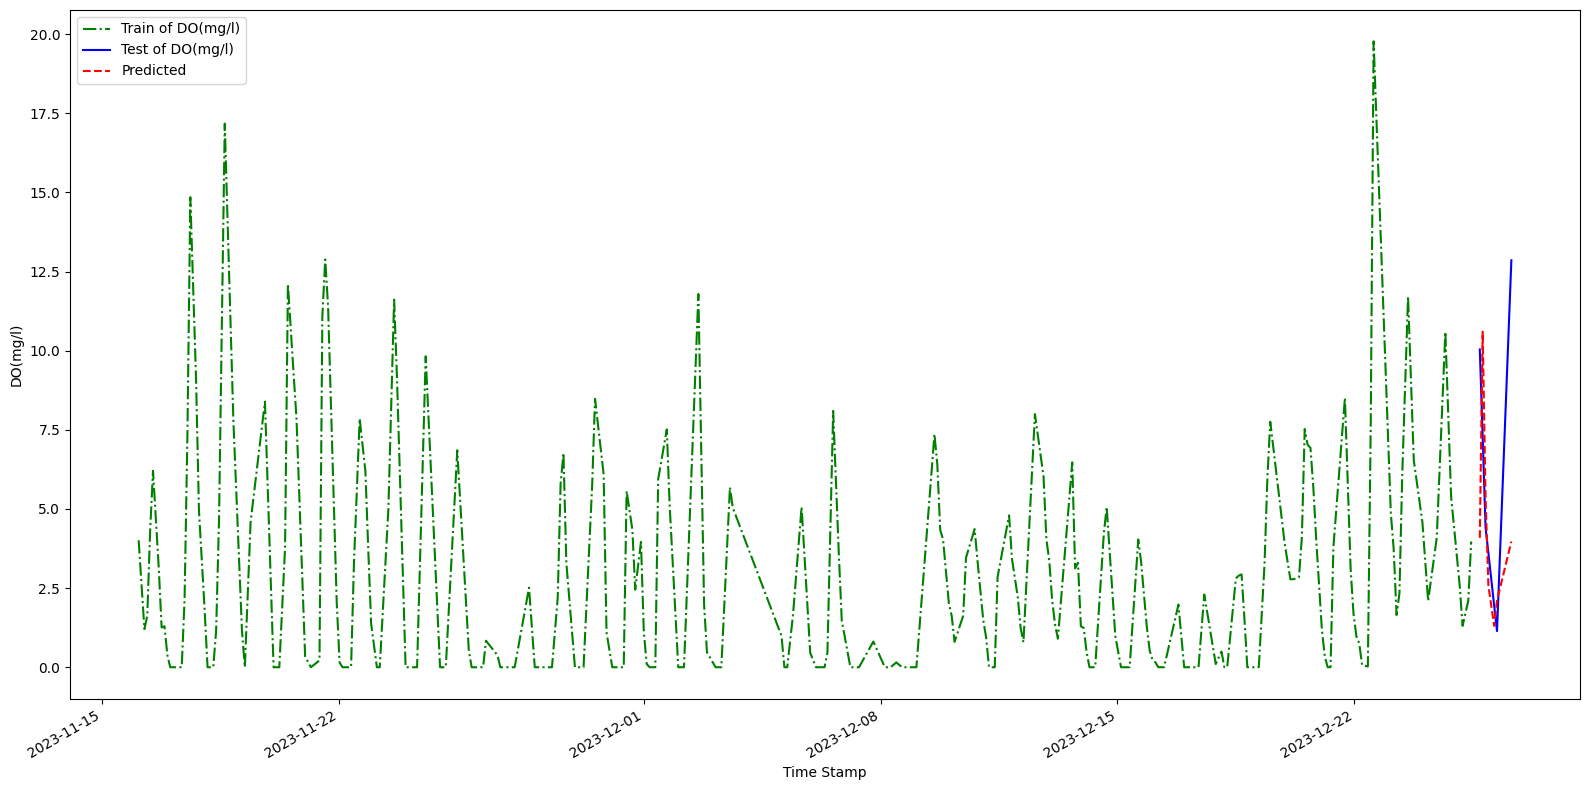

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['DO(mg/l)'], 'g-.', label='Train of DO(mg/l)')
ax.plot(test.index, test['DO(mg/l)'], 'b-', label='Test of DO(mg/l)')

ax.plot(test.index, test['pred_last_season_do'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('DO(mg/l)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

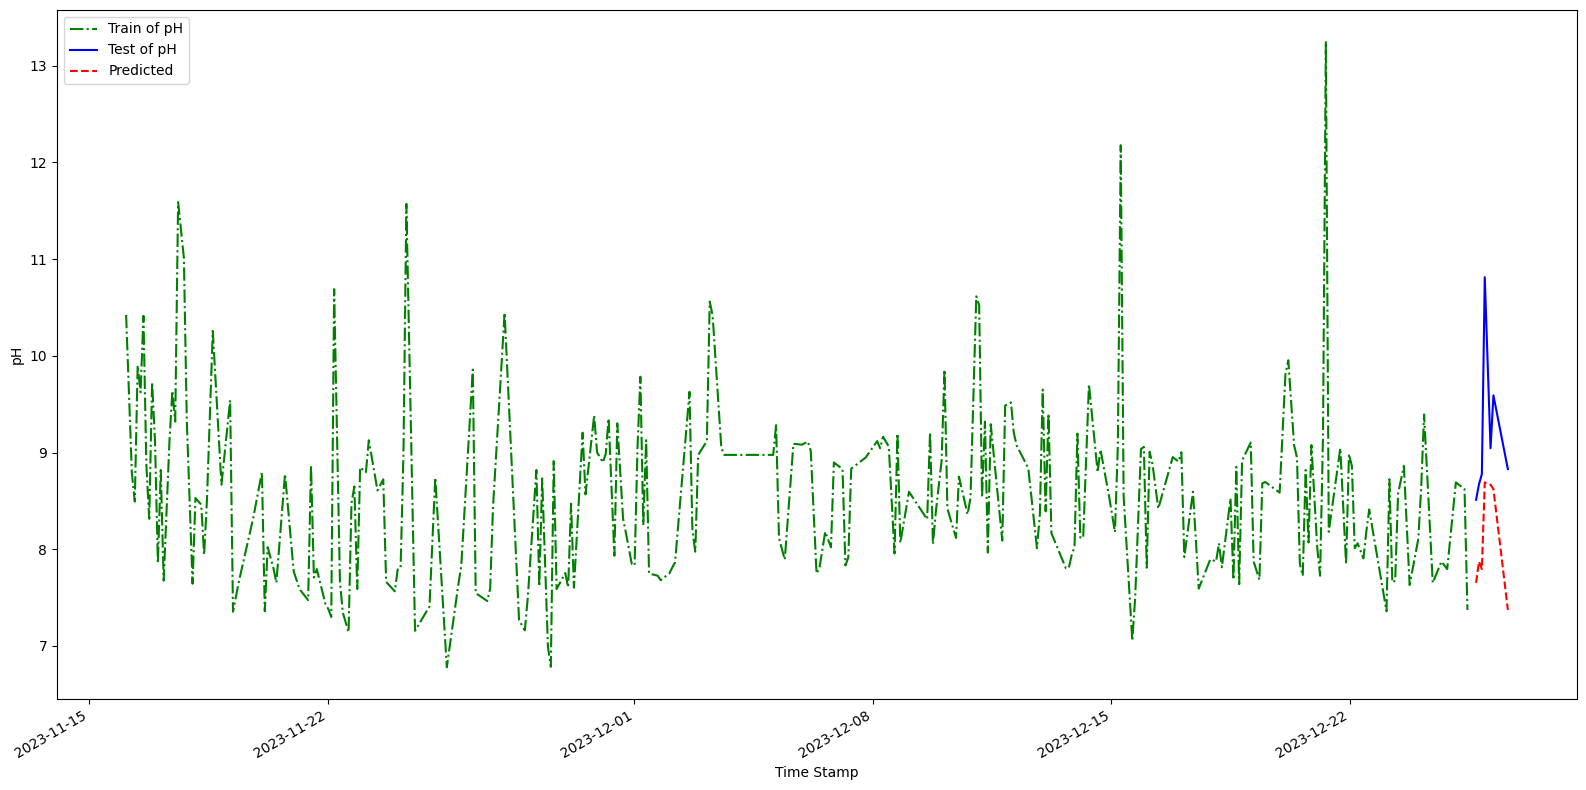

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['pH'], 'g-.', label='Train of pH')
ax.plot(test.index, test['pH'], 'b-', label='Test of pH')

ax.plot(test.index, test['pred_last_season_ph'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('pH')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

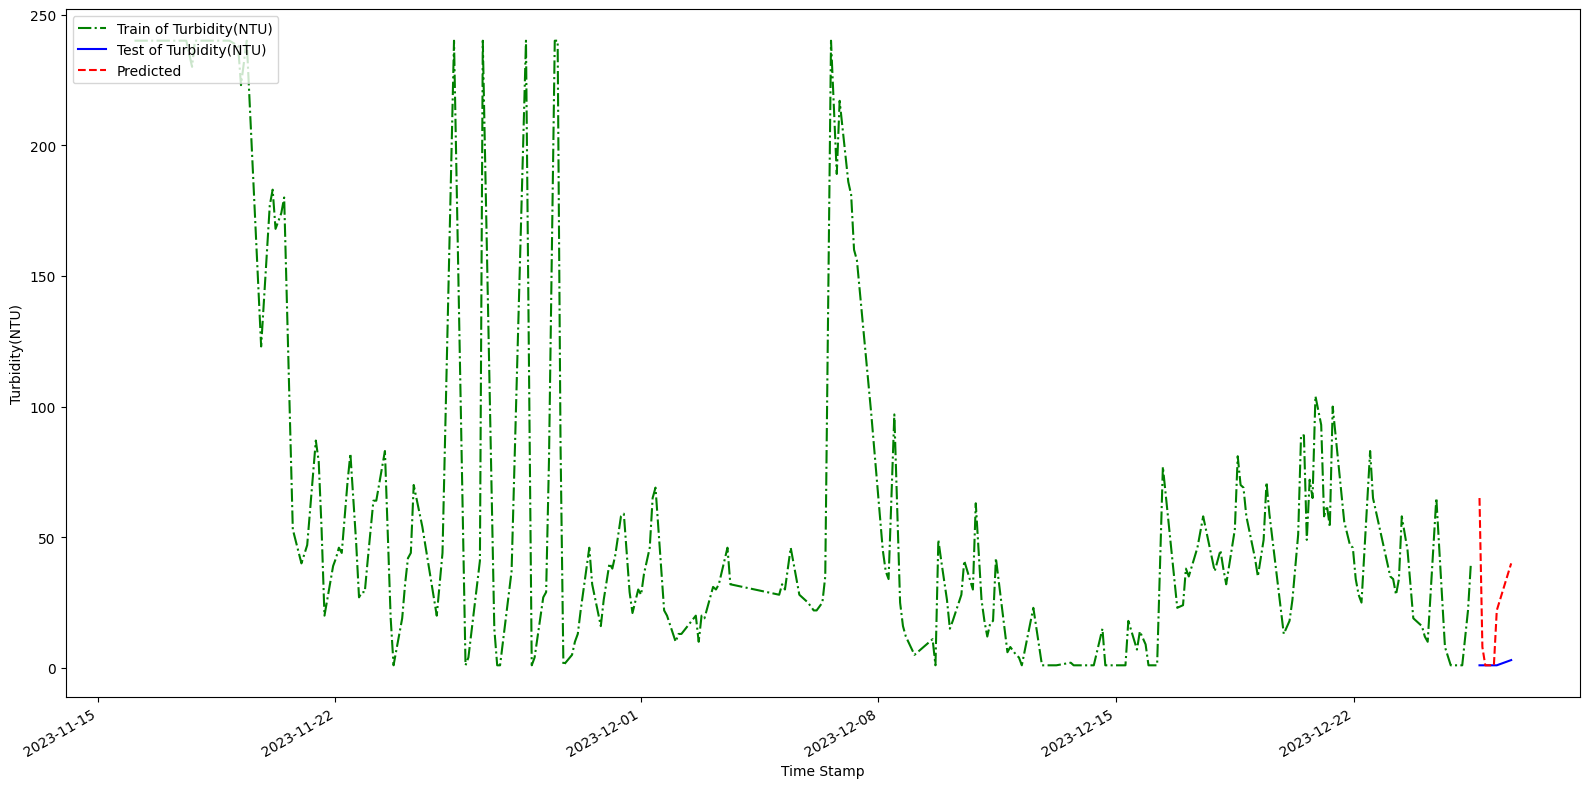

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['Turbidity(NTU)'], 'g-.', label='Train of Turbidity(NTU)')
ax.plot(test.index, test['Turbidity(NTU)'], 'b-', label='Test of Turbidity(NTU)')

ax.plot(test.index, test['pred_last_season_turbidity'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('Turbidity(NTU)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

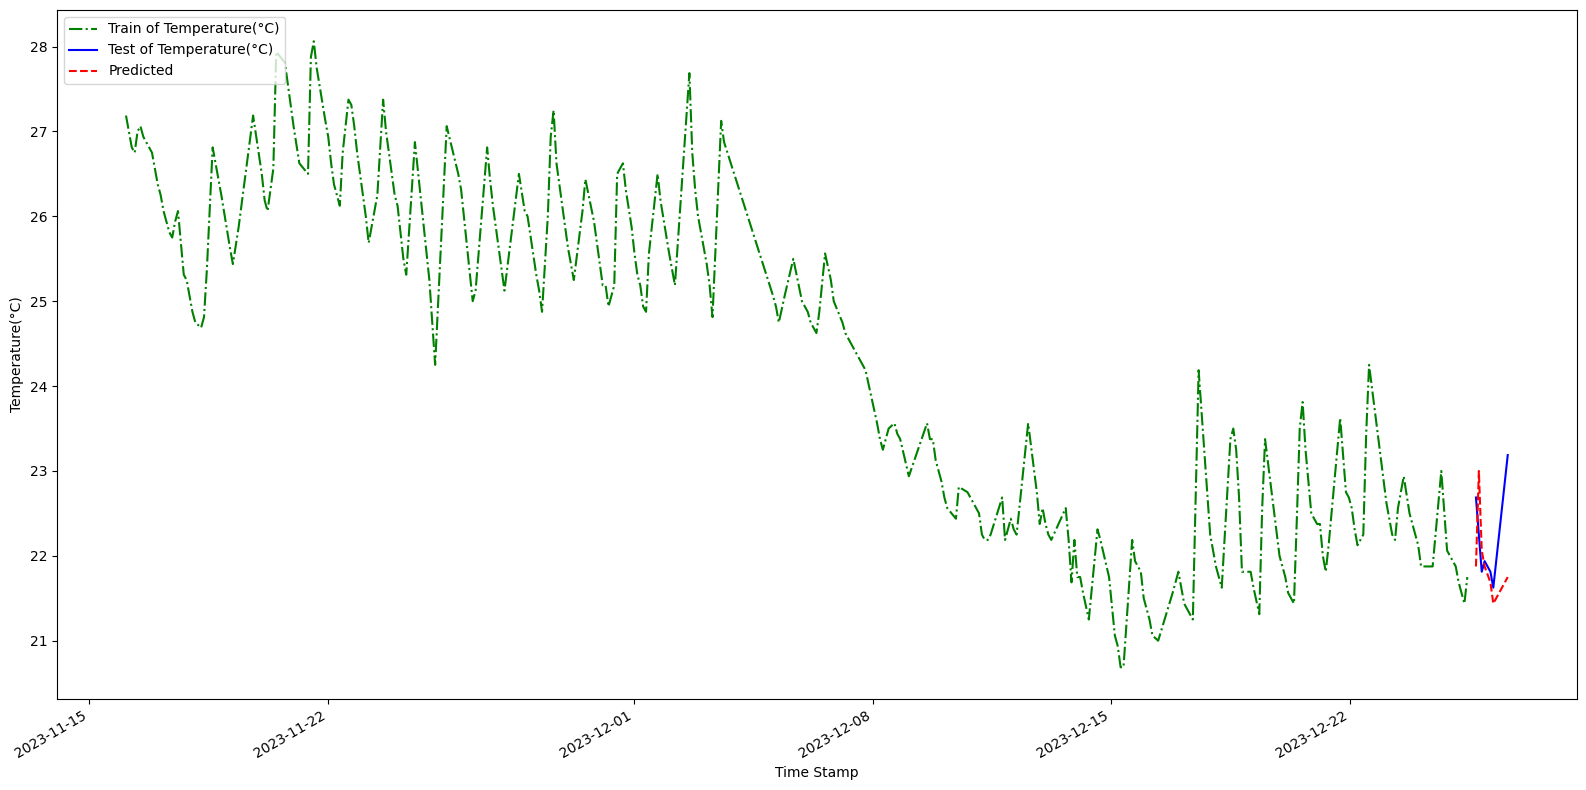

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['Temperature(°C)'], 'g-.', label='Train of Temperature(°C)')
ax.plot(test.index, test['Temperature(°C)'], 'b-', label='Test of Temperature(°C)')

ax.plot(test.index, test['pred_last_season_temp'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('Temperature(°C)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

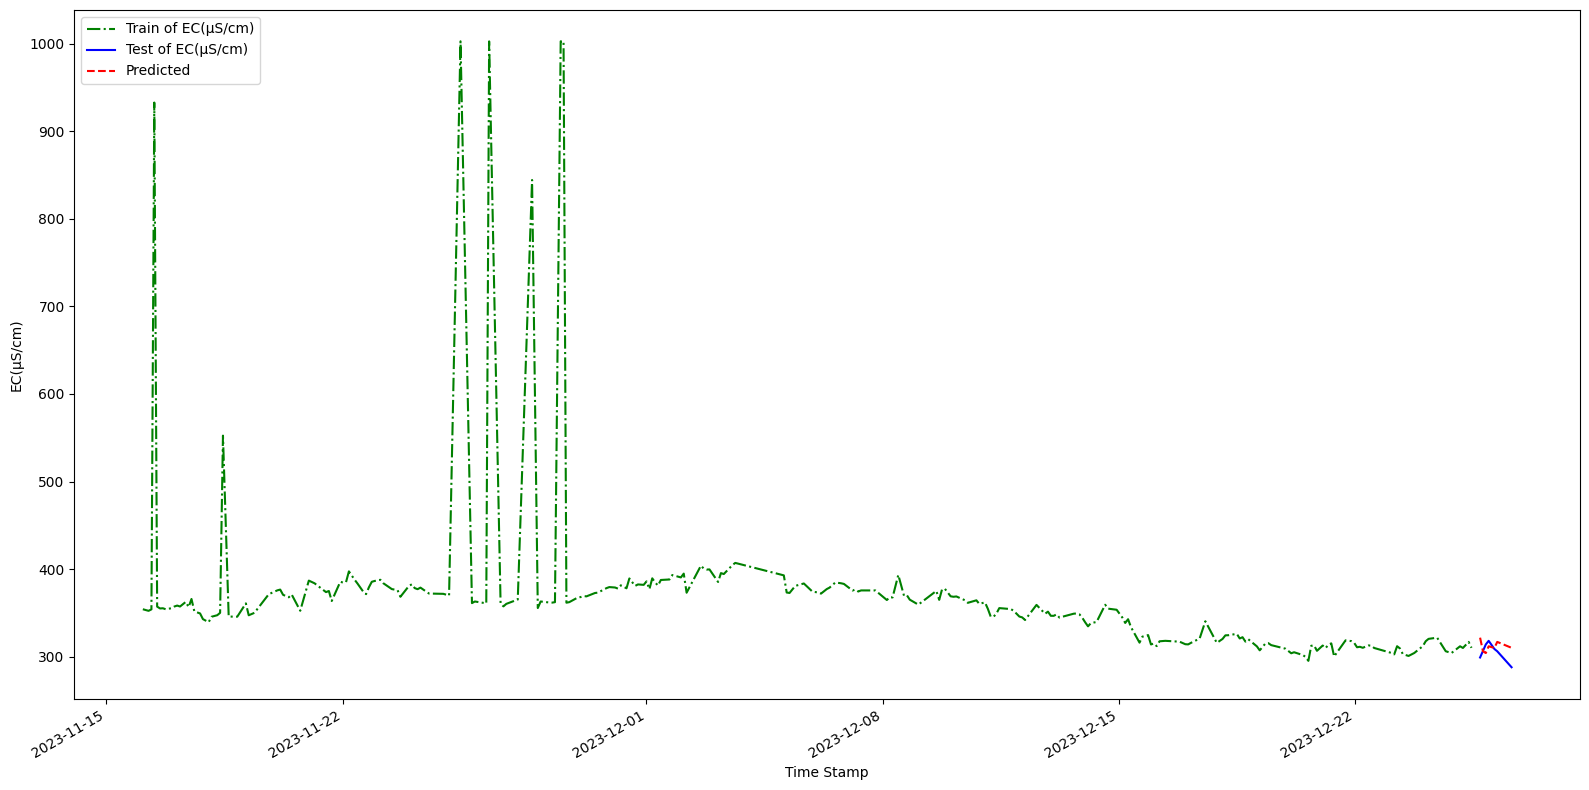

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(train.index, train['EC(µS/cm)'], 'g-.', label='Train of EC(µS/cm)')
ax.plot(test.index, test['EC(µS/cm)'], 'b-', label='Test of EC(µS/cm)')

ax.plot(test.index, test['pred_last_season_ec'], 'r--', label='Predicted')
ax.set_xlabel('Time Stamp')
ax.set_ylabel('EC(µS/cm)')
# ax.axvspan(266, 266, color='#808080', alpha=0.2)
ax.legend(loc=2)
# plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [ ]:
mape_hist_mean_DO, mape_hist_mean_pH, mape_hist_mean_Temp, mape_hist_mean_Turbidity, mape_hist_mean_EC
mape_last_year_mean_DO, mape_last_year_mean_pH, mape_last_year_mean_Turbidity, mape_last_year_mean_Temp, mape_last_year_mean_EC

In [44]:
# ! pip install keras-tuner

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Bidirectional, concatenate
from tensorflow.keras.optimizers import Adam
from kerastuner.tuners import RandomSearch

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/NDL/Fisheris/Dataset/Fisheries Node Data Mymensingh.csv", encoding='unicode_escape', parse_dates=['created_at'])

# Convert 'created_at' to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Set 'created_at' as the index
df.set_index('created_at', inplace=True)
df.drop('Entry', axis=1, inplace=True)

# Feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Function to create sequences for time series forecasting
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i+seq_length]
        sequences.append(sequence)
    return np.array(sequences)

# Define sequence length and split data into training and testing sets
sequence_length = 10  # You can adjust this based on your dataset
X = create_sequences(df_scaled, sequence_length)
y = df_scaled[sequence_length:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a function to create the model
def build_model(units_lstm_1, units_lstm_2, units_dense, units_bilstm, learning_rate):
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))

    # First LSTM layer
    lstm_layer_1 = LSTM(units=units_lstm_1, activation='relu', return_sequences=True)(inputs)

    # Second LSTM layer
    lstm_layer_2 = LSTM(units=units_lstm_2, activation='relu')(lstm_layer_1)

    # Dense layer
    dense_layer1 = Dense(units=32, activation='relu')(lstm_layer_2)
    dense_layer2 = Dense(units=64, activation='relu')(dense_layer1)
    dense_layer3 = Dense(units=128, activation='relu')(dense_layer2)

    # BiLSTM layer
    # bilstm_layer = Bidirectional(LSTM(units=units_bilstm, activation='relu'))(inputs)

    # # Second Dense layer
    # dense_layer_2 = Dense(units=units_dense, activation='relu')(bilstm_layer)

    # # Concatenate the outputs
    # merged_layer = concatenate([dense_layer, dense_layer3])

    # Output layer
    outputs = Dense(units=df.shape[1])(dense_layer3)

    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model with the specified learning rate
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')

    return model

# Set the number of units for each layer
units_lstm_1 = 16  #8
units_lstm_2 = 32 # 16
units_dense = 8
units_bilstm = 64
learning_rate = 0.001

# Build the model
model = build_model(units_lstm_1, units_lstm_2, units_dense, units_bilstm, learning_rate)

# Display the model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to the original scale
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

# Calculate and print evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error: {mse}')


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 10, 5)]           0         
                                                                 
 lstm_6 (LSTM)               (None, 10, 16)            1408      
                                                                 
 lstm_7 (LSTM)               (None, 32)                6272      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 64)                2112      
                                                                 
 dense_14 (Dense)            (None, 128)               8320      
                                                                 
 dense_15 (Dense)            (None, 5)                 645 

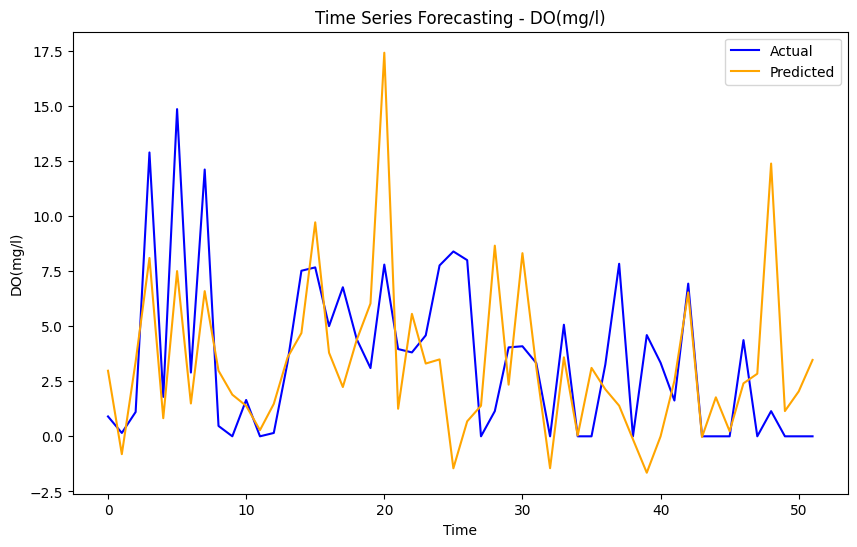

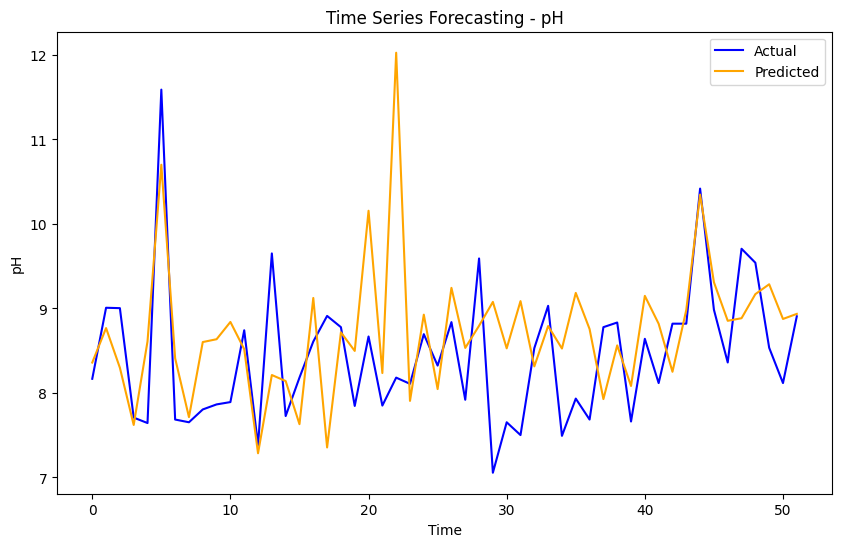

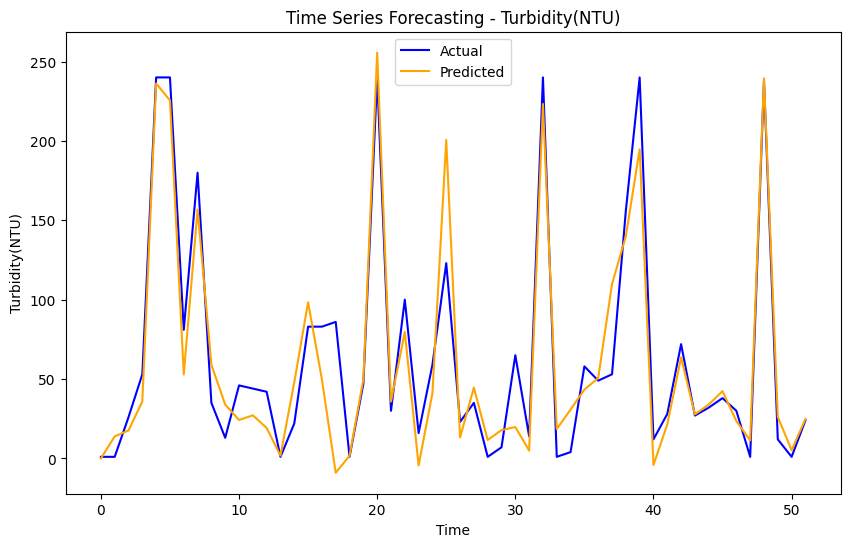

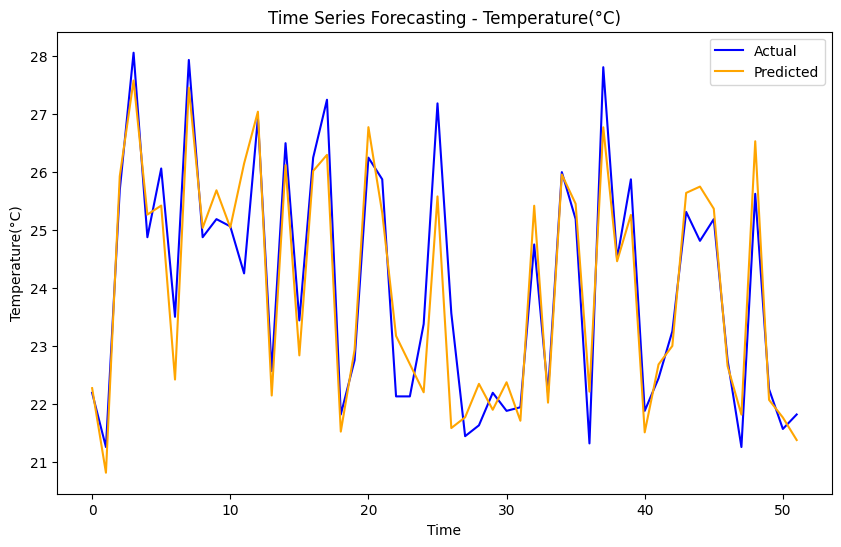

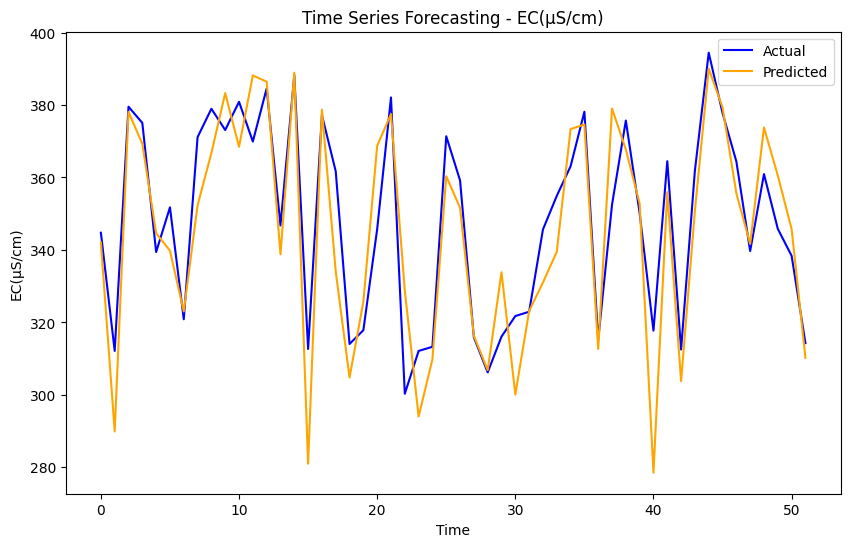

In [45]:
import matplotlib.pyplot as plt

# Choose the number of features
num_features = df.shape[1]

# Plotting the actual vs predicted values for each feature
for feature_index in range(num_features):
    plt.figure(figsize=(10, 6))

    plt.plot(y_test_inv[:, feature_index], label='Actual', color='blue')
    plt.plot(y_pred_inv[:, feature_index], label='Predicted', color='orange')

    # Adjust the title and labels based on the feature
    plt.title(f'Time Series Forecasting - {df.columns[feature_index]}')
    plt.xlabel('Time')
    plt.ylabel(df.columns[feature_index])
    plt.legend()
    plt.show()


In [43]:
import shutil
import os

folder_path = '/content/hyperparameter_tuning'

# Ensure the folder exists before attempting to delete it
if os.path.exists(folder_path):
    try:
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' successfully deleted.")
    except Exception as e:
        print(f"Error deleting folder: {e}")
else:
    print(f"Folder '{folder_path}' does not exist.")

Folder '/content/hyperparameter_tuning' successfully deleted.
